In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/BC_Project/'

/content/drive/My Drive/BC_Project


In [ ]:
%%html
<!DOCTYPE html><html><body align="right"><br><div style="direction:;ltr"><p style="background-color: #F7FFCA; color:black; border:1px solid black; border-radius: 10px; font-size:32px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 15px;" >
Import libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import matplotlib.ticker as ticker


In [2]:
#file names in the directory
import os
os.listdir()

['.ipynb_checkpoints',
 'Backup codes.pdf',
 'backup.tar.gz',
 'backup_2021-09-25_09-04.sql',
 'Banditi Curva Sud Milano 🔴⚫️ (@banditi.curvasudmilano) • Instagram photos and videos.html',
 'Banditi Curva Sud Milano 🔴⚫️ (@banditi.curvasudmilano) • Instagram photos and videos_files',
 'desktop.ini',
 'Dropbox.lnk',
 'Grammarly.lnk',
 'IDMan.exe - Shortcut.lnk',
 'item_base_model_preprocessing.ipynb',
 'KMSAuto.++.1.5.6_(asdownload.net)',
 'Loyal_Champion_type_base_run.ipynb',
 'ML',
 'ML jup.bat',
 'nbp_version_3.py',
 'nbp_version_4.py',
 'parent .ipynb',
 'start.exe - Shortcut.lnk',
 'Untitled.png',
 'انیمیشن ماشین ها 1 دوبله فارسی (1).webm']

In [ ]:
%%html
<!DOCTYPE html><html><body align="right"><br><div style="direction:;ltr"><p style="background-color: #F7FFCA; color:black; border:1px solid black; border-radius: 10px; font-size:32px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 15px;" >
Import Class table

In [ ]:
#read class DataFrame and set its columns' names
class_df = pd.read_csv('CLASS.csv')
class_df=class_df.rename(columns={"id":"classid","name":"class_name"})
class_df=class_df.drop_duplicates()

#number of missing values in each column
print(class_df.isnull().sum())

class_df

classid             0
class_name          0
primaryparentid    10
dtype: int64


classid                     class_name  primaryparentid
0        198             الکتریکی و روشنایی            123.0
1          1                           root              NaN
2         35       پنیر پیتزا و سایر پنیرها             16.0
3          3                           خامه             16.0
4        182         محصولات مراقبت از پوست            124.0
..       ...                            ...              ...
193       46  کافی میکس، نسکافه و هات چاکلت            102.0
194       32         کرن فلکس و غلات صبحانه             42.0
195       24                           قارچ            101.0
196      103                 میوه و سبزیجات              1.0
197       16               لبنیات و تخم مرغ              1.0

[198 rows x 3 columns]

In [ ]:
#columns that one of its values is missing
class_df[class_df.primaryparentid.isnull()]

classid                    class_name  primaryparentid
1          1                          root              NaN
18       153  حلوا‌،ارده‌وفراورده‌هایکنجدی              NaN
28       196                        از شصت              NaN
34       203                     خمیر مایه              NaN
35       204               بادمجان سرخ شده              NaN
101      207              اسپری دافع حشرات              NaN
102      208                         سرشیر              NaN
103      209                     برگ چغندر              NaN
104      210                          مرزه              NaN
184      187           میوه و سبزیجات تازه              NaN

In [ ]:
#classes that their parent is 1 (root). it means that they are primary parents.
class_df[class_df.primaryparentid==1]

classid                      class_name  primaryparentid
20        93                شوینده و بهداشتی              1.0
27       195                      از دهه شصت              1.0
30       188                         نان سحر              1.0
32       202                  به قیمت پارسال              1.0
42       123                    ملزومات خانه              1.0
61       102                      نوشیدنی‌ها              1.0
64       205                       گل و گیاه              1.0
65       181                      ویژه رمضان              1.0
80        42                          صبحانه              1.0
84        94                      مخلفات غذا              1.0
87        31                   غلات و حبوبات              1.0
94         8                  کالا‌های اساسی              1.0
95        25  کمپوت، غذای آماده و نیمه آماده              1.0
96        20                            کودک              1.0
100      206               کالای اساسی ارزان              1.0
112      125                 تنقلات و شیرینی              1.0
115      104            لوازم تحریر و فرهنگی              1.0
119      120                   حیوانات‌خانگی              1.0
134      101                  گوشت و پروتئین              1.0
138      119                  ذغال و آتش زنه              1.0
174      158                   آجیل و خشکبار              1.0
175      124                     بهداشت شخصی              1.0
178      186               لوازم مصرفی خودرو              1.0
179       17                 چاشنی و افزودنی              1.0
185      201                            یلدا              1.0
196      103                  میوه و سبزیجات              1.0
197       16                لبنیات و تخم مرغ              1.0

In [ ]:
#assign classes with no parent to primary parents
class_df.loc[[18],'primaryparentid'] = 42
class_df.loc[[28],'primaryparentid'] = 1
class_df.loc[[34],'primaryparentid'] = 125
class_df.loc[[35],'primaryparentid'] = 94
class_df.loc[[101],'primaryparentid'] = 93
class_df.loc[[102],'primaryparentid'] = 16
class_df.loc[[103,104,184],'primaryparentid'] = 103
class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   classid          198 non-null    int64  
 1   class_name       198 non-null    object 
 2   primaryparentid  197 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.3+ KB


In [ ]:
#create a column nemad "parent_name" that shows name of parent. (it's for plot)
def get_name(row):
  if np.isnan(row):
    return row
  return (class_df[class_df.classid == row].iloc[0])['class_name']
class_df['parent_name'] = class_df['primaryparentid'].apply(get_name)
class_df


classid                     class_name  primaryparentid       parent_name
0        198             الکتریکی و روشنایی            123.0      ملزومات خانه
1          1                           root              NaN               NaN
2         35       پنیر پیتزا و سایر پنیرها             16.0  لبنیات و تخم مرغ
3          3                           خامه             16.0  لبنیات و تخم مرغ
4        182         محصولات مراقبت از پوست            124.0       بهداشت شخصی
..       ...                            ...              ...               ...
193       46  کافی میکس، نسکافه و هات چاکلت            102.0        نوشیدنی‌ها
194       32         کرن فلکس و غلات صبحانه             42.0            صبحانه
195       24                           قارچ            101.0    گوشت و پروتئین
196      103                 میوه و سبزیجات              1.0              root
197       16               لبنیات و تخم مرغ              1.0              root

[198 rows x 4 columns]

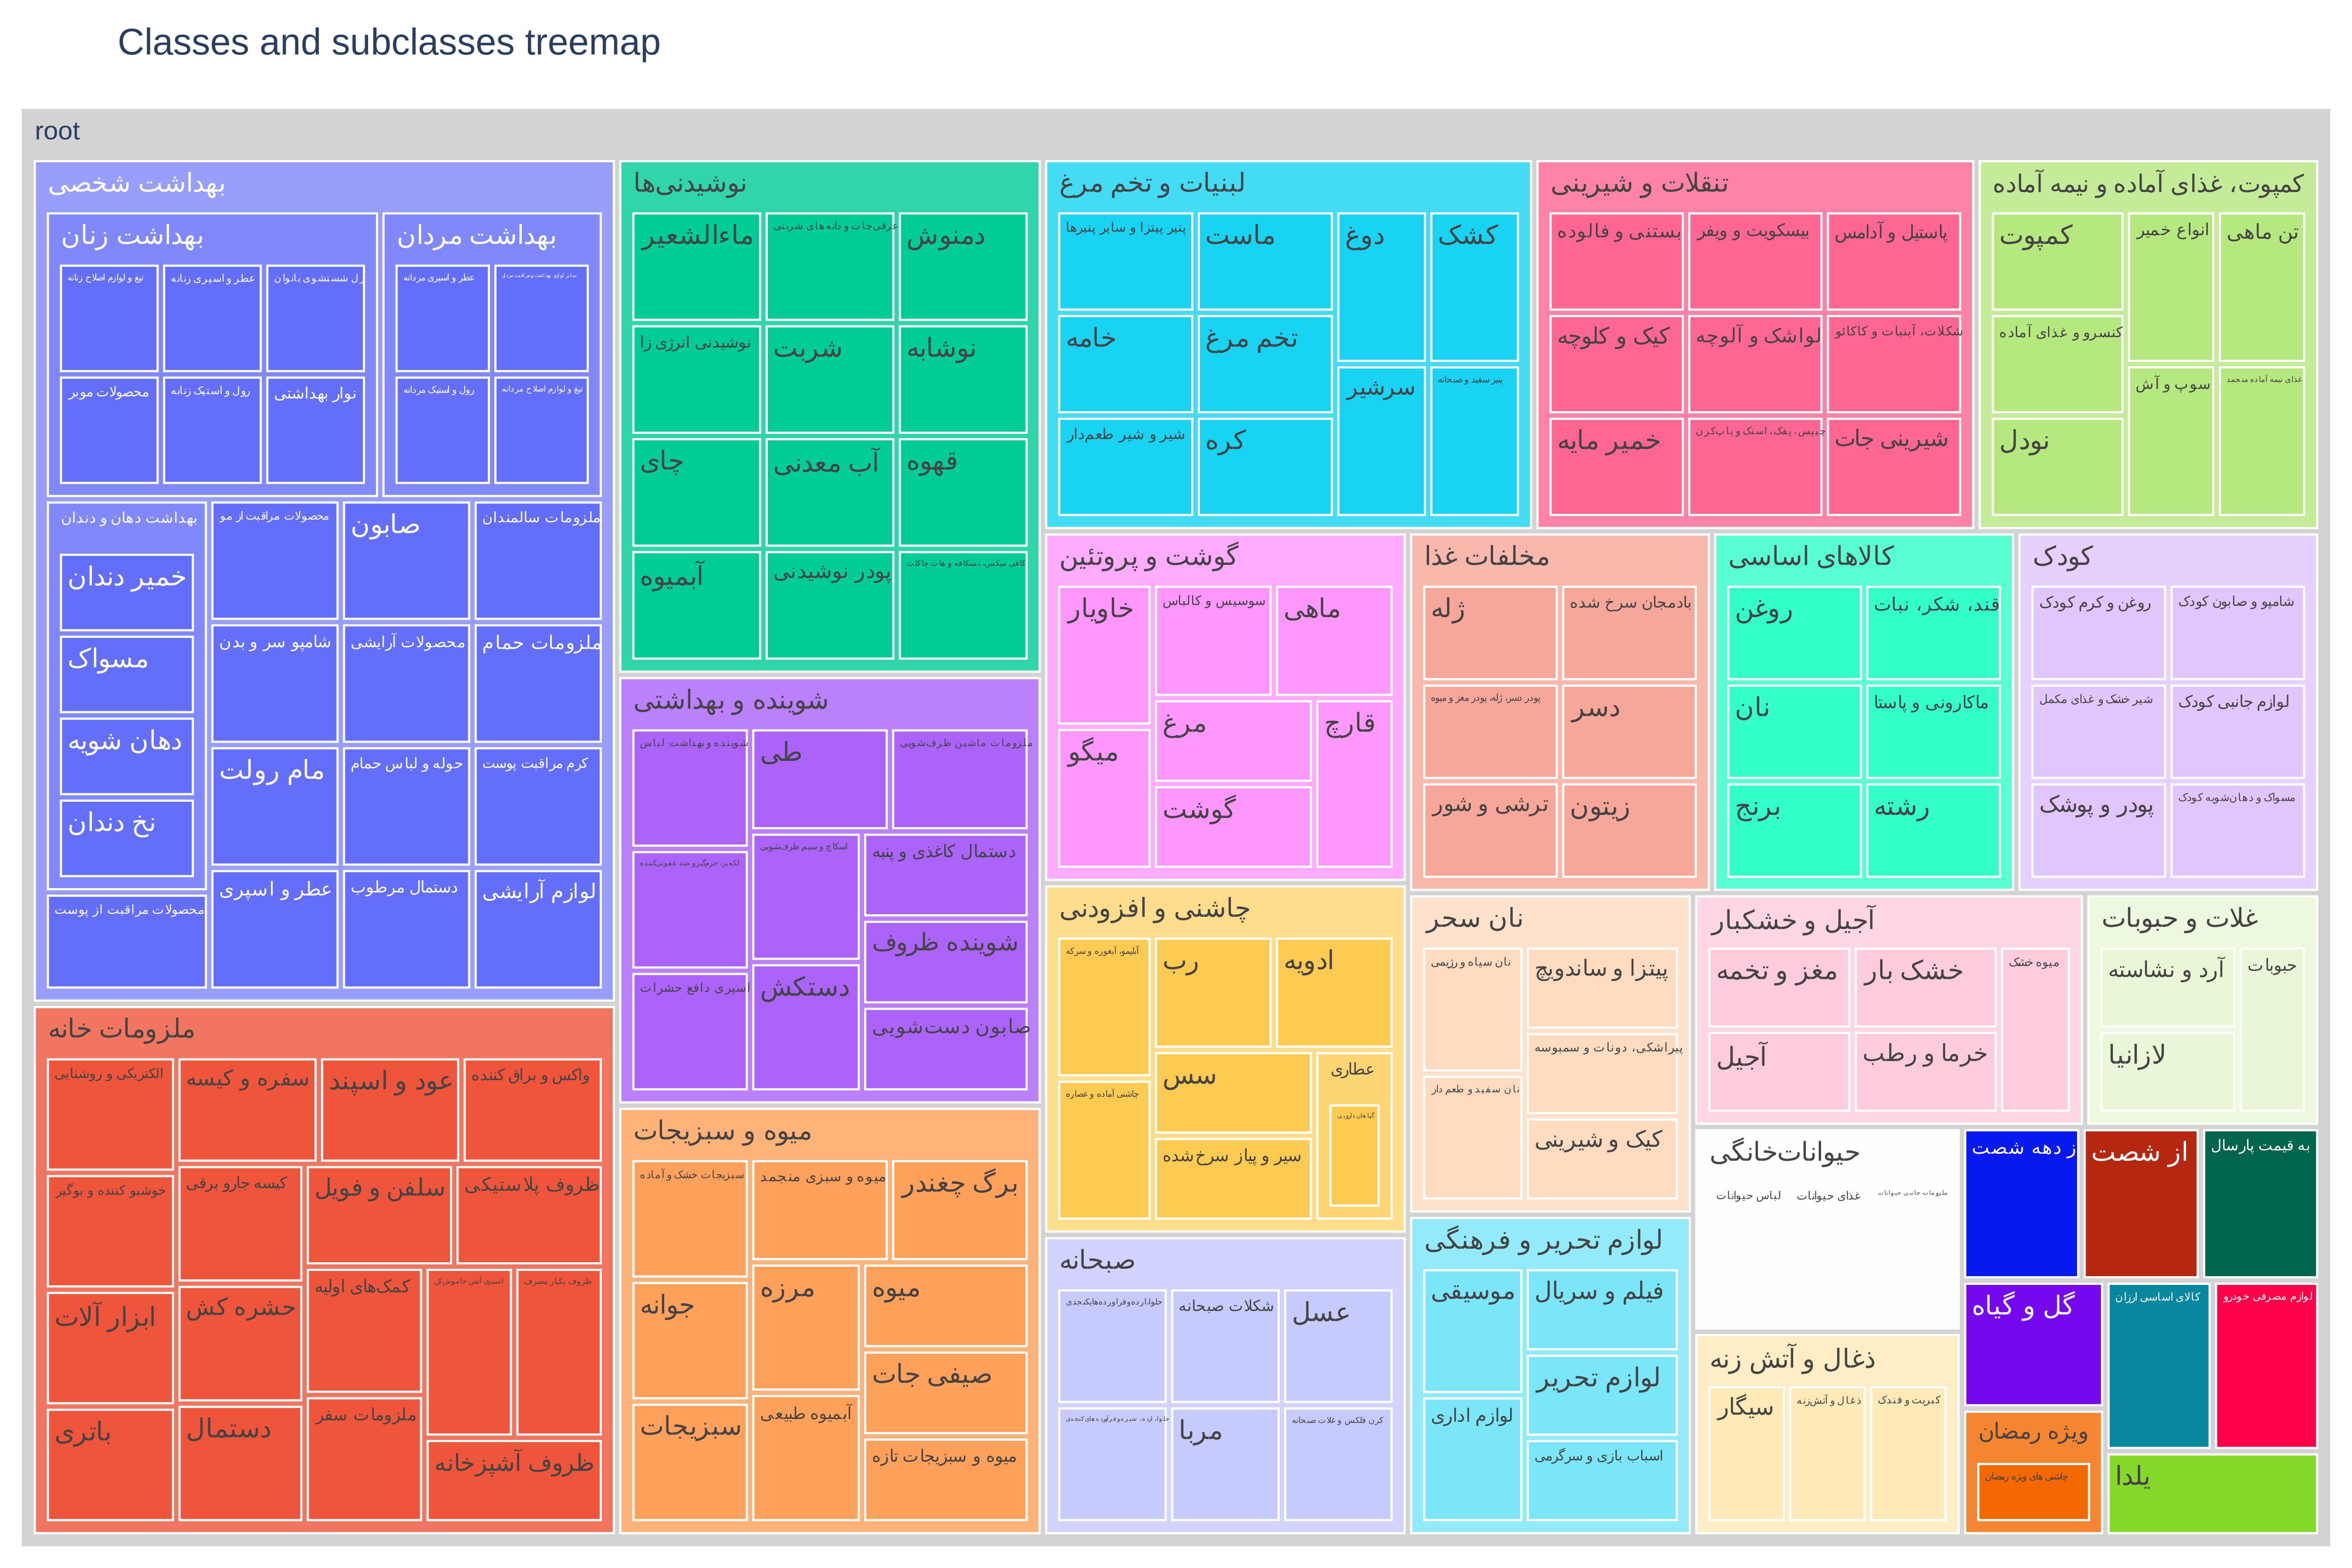

In [3]:
#tree-map plot that shows relationship between parents and children. size for each child isn't set.
!pip install --upgrade "kaleido==0.1.*"

fig = px.treemap(    names = class_df.class_name, parents = class_df.parent_name,title='Classes and subclasses treemap')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=10, r=10, b=10))
fig.write_image("fig1.png", width=1080, height=720,scale = 5,format ='png')

fig.show()

In [2]:
%%html 
<!DOCTYPE html><html><body align="right"><br><div style="direction:;ltr"><p style="background-color: #F7FFCA; color:black; border:1px solid black; border-radius: 10px; font-size:32px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 15px;" >
Import Category table

In [ ]:
#read categories DataFrame, set its columns' name and print number of missing values.
cat_df = pd.read_csv('CAT.csv')
cat_df=cat_df.rename(columns={"id":"catid","name":"cat_name"})
cat_df=cat_df.drop_duplicates()
print(cat_df.isnull().sum())
print(cat_df.info())
print(cat_df[cat_df.cat_name.isnull()])
cat_df[cat_df.cat_name.isnull()]

catid       0
cat_name    1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2063
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   catid     2064 non-null   int64 
 1   cat_name  2063 non-null   object
dtypes: int64(1), object(1)
memory usage: 48.4+ KB
None
      catid cat_name
2013   2895      NaN


catid cat_name
2013   2895      NaN

In [3]:
%%html
<!DOCTYPE html><html><body align="right"><br><div style="direction:;ltr"><p style="background-color: #F7FFCA; color:black; border:1px solid black; border-radius: 10px; font-size:32px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 15px;" >
Import Items table

In [ ]:
#read Items DataFrame, set its columns' name and print number of missing values.
items_df = pd.read_csv('Items.csv')
items_df=items_df.rename(columns={"id":"iid","name":"item_name",'categoryid':'classid','typeid':'catid','id.1':'brandid','name.1':'brand_name'})
items_df=items_df.drop_duplicates()
print(items_df.isnull().sum())
items_df

iid               0
item_name         0
classid        9723
catid         17371
brandid       17990
brand_name    17994
dtype: int64


iid                                   item_name  classid   catid  \
0         13      ظرف فریزری مستطیل 400‌میلی‌لیتری لیمون    109.0  1486.0   
3         14     ظرف فریزری مستطیل 2600‌میلی‌لیتری لیمون    109.0  1486.0   
6         15   دستمال کاغذی 2‌لایه 150‌برگ طرح مینا چشمک    106.0   606.0   
9         24                رب گوجه فرنگی 350‌گرمی خوشاب      9.0   646.0   
12        25                  مسواک نرم مسافرتی ‏G.U.M‏     170.0  2051.0   
...      ...                                         ...      ...     ...   
125438  9409                      خامه عسل 100‌گرمی میهن      3.0   537.0   
125441  9429  شیر لایت کم‌چرب 1000میلی‌لیتری فرادما میهن     51.0  1985.0   
125444  9637             چیپس ماست موسیر 80‌گرمی ترددیلا    131.0   522.0   
125447  9752        مایع ظرف‌شویی 3500‌میلی‌لیتری هوم‌کر    126.0  1349.0   
125450  9755        مایع لباس‌شویی 2650میلی‌لیتری هوم‌کر    105.0  1350.0   

        brandid brand_name  
0         137.0      لیمون  
3         137.0      لیمون  
6         550.0       چشمک  
9         138.0      خوشاب  
12        876.0      G.U.M  
...         ...        ...  
125438      8.0       میهن  
125441      8.0       میهن  
125444    565.0    ترددیلا  
125447     47.0     هوم‌کر  
125450     47.0     هوم‌کر  

[53811 rows x 6 columns]

In [ ]:
#category number 2895 name was missing. we want to know which items are related to that.
items_df[items_df.catid==2895]


iid                               item_name  classid   catid  \
59286  58953  چای سیاه کیسه با طعم هل ۲۵‌عددی شهرزاد     54.0  2895.0   
70744  57839      آلوئه‌ورا 1000‌میلی‌لیتری اردیبهشت     48.0  2895.0   

       brandid brand_name  
59286    227.0     شهرزاد  
70744    914.0   اردیبهشت

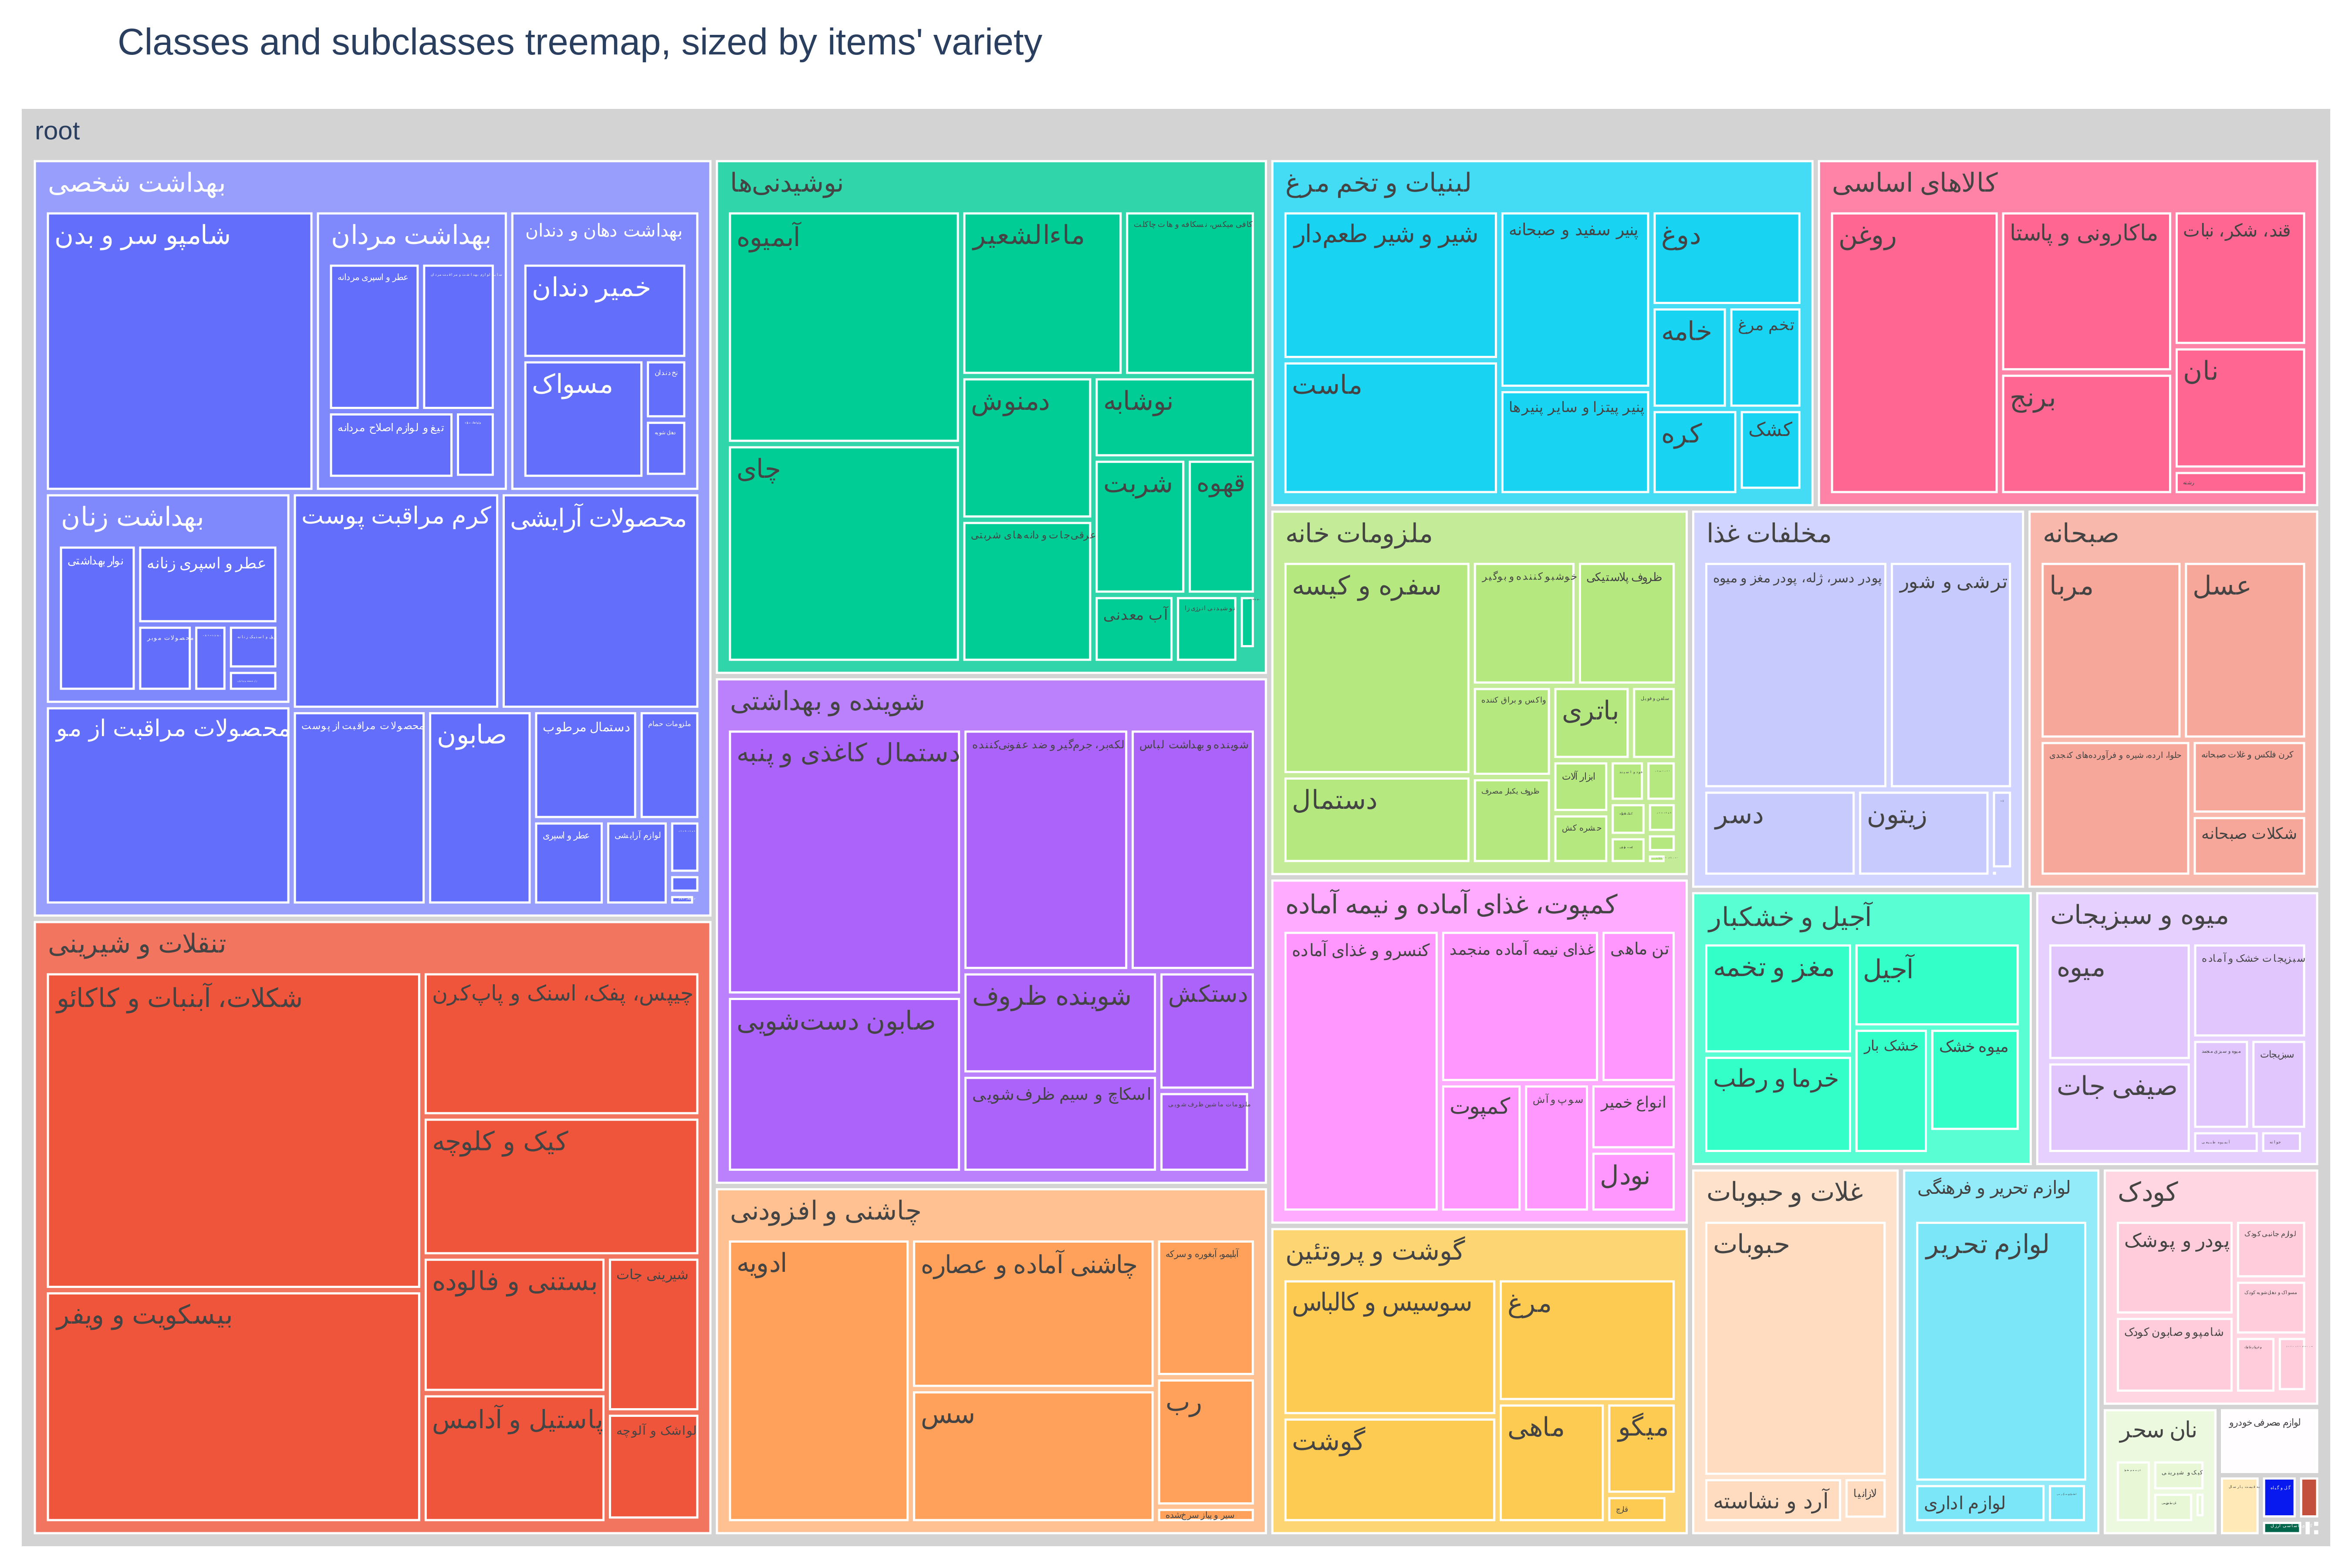

In [4]:
# plot tree-map that each child's size depends on the number of its subset
item_counts = items_df.groupby('classid').count().reset_index()[['classid','iid']].rename(columns = {'iid':'counts'})
item_counts = pd.merge(class_df , item_counts,how='left')
item_counts.counts.fillna(0,inplace = True) 
fig = px.treemap(    names = item_counts.class_name, parents = item_counts.parent_name , values = item_counts['counts'],title="Classes and subclasses treemap, sized by items' variety")
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=10, r=10, b=10))
fig.write_image("fig2.png", width=1080, height=720,scale = 5,format = 'png')
fig.show()

In [4]:
%%html
<!DOCTYPE html><html><body align="right"><br><div style="direction:;ltr"><p style="background-color: #F7FFCA; color:black; border:1px solid black; border-radius: 10px; font-size:32px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 15px;" >
Import Order table

In [ ]:
#read Orders DataFrame and set its columns' name.
orders_df=pd.read_csv('ORDERS.csv')
orders_df=orders_df.rename(columns={"id":"bid","id.1":"cid","id.2":"catid",'categoryid':'classid',"id.3":"iid","quantitystepcount":"quantity","totaloriginalprice":"price","?column?":"days"})
""" bid:    basket ID
    cid:    customer ID
    catid:  category ID
    iid:    item ID
    days:   days' count from that order
"""
orders_df

bid      cid                checkoutdate  classid   catid  \
0        12830642  2149164  2021-06-15 19:13:28.437000    131.0   246.0   
1        12830642  2149164  2021-06-15 19:13:28.437000    130.0   424.0   
2        12830642  2149164  2021-06-15 19:13:28.437000     10.0  1448.0   
3        12830642  2149164  2021-06-15 19:13:28.437000     70.0  1154.0   
4        12830642  2149164  2021-06-15 19:13:28.437000    132.0  1236.0   
...           ...      ...                         ...      ...     ...   
2511475        91        7  2018-06-03 18:08:44.675000    144.0   375.0   
2511476        91        7  2018-06-03 18:08:44.675000    144.0  1521.0   
2511477        91        7  2018-06-03 18:08:44.675000    110.0   595.0   
2511478        91        7  2018-06-03 18:08:44.675000      4.0   390.0   
2511479        91        7  2018-06-03 18:08:44.675000    144.0   613.0   

             iid  quantity    price segmentationlabel  days  marketid  
0        12915.0       2.0  12000.0               NaN     1       5.0  
1        38865.0       2.0  65000.0               NaN     1       5.0  
2        30994.0       1.0  12000.0               NaN     1       5.0  
3        30288.0       2.0  10800.0               NaN     1       5.0  
4        15074.0       2.0   6000.0               NaN     1       5.0  
...          ...       ...      ...               ...   ...       ...  
2511475   3890.0       1.0   1400.0             goneZ  1109       1.0  
2511476   3854.0       1.0   1700.0             goneZ  1109       1.0  
2511477    554.0       1.0   6480.0             goneZ  1109       1.0  
2511478    566.0       1.0  14900.0             goneZ  1109       1.0  
2511479    697.0       1.0   1600.0             goneZ  1109       1.0  

[2511480 rows x 11 columns]

In [ ]:
#misssing values
print(orders_df.isnull().sum())
orders_df

bid                       0
cid                       0
checkoutdate              0
classid                 735
catid                 17373
iid                       5
quantity                  5
price                     5
segmentationlabel    356569
days                      0
marketid                  5
dtype: int64


bid      cid                checkoutdate  classid   catid  \
0        12830642  2149164  2021-06-15 19:13:28.437000    131.0   246.0   
1        12830642  2149164  2021-06-15 19:13:28.437000    130.0   424.0   
2        12830642  2149164  2021-06-15 19:13:28.437000     10.0  1448.0   
3        12830642  2149164  2021-06-15 19:13:28.437000     70.0  1154.0   
4        12830642  2149164  2021-06-15 19:13:28.437000    132.0  1236.0   
...           ...      ...                         ...      ...     ...   
2511475        91        7  2018-06-03 18:08:44.675000    144.0   375.0   
2511476        91        7  2018-06-03 18:08:44.675000    144.0  1521.0   
2511477        91        7  2018-06-03 18:08:44.675000    110.0   595.0   
2511478        91        7  2018-06-03 18:08:44.675000      4.0   390.0   
2511479        91        7  2018-06-03 18:08:44.675000    144.0   613.0   

             iid  quantity    price segmentationlabel  days  marketid  
0        12915.0       2.0  12000.0               NaN     1       5.0  
1        38865.0       2.0  65000.0               NaN     1       5.0  
2        30994.0       1.0  12000.0               NaN     1       5.0  
3        30288.0       2.0  10800.0               NaN     1       5.0  
4        15074.0       2.0   6000.0               NaN     1       5.0  
...          ...       ...      ...               ...   ...       ...  
2511475   3890.0       1.0   1400.0             goneZ  1109       1.0  
2511476   3854.0       1.0   1700.0             goneZ  1109       1.0  
2511477    554.0       1.0   6480.0             goneZ  1109       1.0  
2511478    566.0       1.0  14900.0             goneZ  1109       1.0  
2511479    697.0       1.0   1600.0             goneZ  1109       1.0  

[2511480 rows x 11 columns]

In [ ]:
#drop some missing values that contains a small part of the dataset
orders_df.dropna(subset = ['classid','catid','iid','quantity','price','marketid'],inplace = True)
print(orders_df.isnull().sum())
orders_df

bid                       0
cid                       0
checkoutdate              0
classid                   0
catid                     0
iid                       0
quantity                  0
price                     0
segmentationlabel    353911
days                      0
marketid                  0
dtype: int64


bid      cid                checkoutdate  classid   catid  \
0        12830642  2149164  2021-06-15 19:13:28.437000    131.0   246.0   
1        12830642  2149164  2021-06-15 19:13:28.437000    130.0   424.0   
2        12830642  2149164  2021-06-15 19:13:28.437000     10.0  1448.0   
3        12830642  2149164  2021-06-15 19:13:28.437000     70.0  1154.0   
4        12830642  2149164  2021-06-15 19:13:28.437000    132.0  1236.0   
...           ...      ...                         ...      ...     ...   
2511475        91        7  2018-06-03 18:08:44.675000    144.0   375.0   
2511476        91        7  2018-06-03 18:08:44.675000    144.0  1521.0   
2511477        91        7  2018-06-03 18:08:44.675000    110.0   595.0   
2511478        91        7  2018-06-03 18:08:44.675000      4.0   390.0   
2511479        91        7  2018-06-03 18:08:44.675000    144.0   613.0   

             iid  quantity    price segmentationlabel  days  marketid  
0        12915.0       2.0  12000.0               NaN     1       5.0  
1        38865.0       2.0  65000.0               NaN     1       5.0  
2        30994.0       1.0  12000.0               NaN     1       5.0  
3        30288.0       2.0  10800.0               NaN     1       5.0  
4        15074.0       2.0   6000.0               NaN     1       5.0  
...          ...       ...      ...               ...   ...       ...  
2511475   3890.0       1.0   1400.0             goneZ  1109       1.0  
2511476   3854.0       1.0   1700.0             goneZ  1109       1.0  
2511477    554.0       1.0   6480.0             goneZ  1109       1.0  
2511478    566.0       1.0  14900.0             goneZ  1109       1.0  
2511479    697.0       1.0   1600.0             goneZ  1109       1.0  

[2494096 rows x 11 columns]

In [ ]:
# delete rows that contain wrong values
orders_df = orders_df[orders_df['price']>300]
orders_df = orders_df[orders_df['quantity']>0]

In [ ]:
#segmentation label values
orders_df.segmentationlabel.unique()

array([nan, 'goneSo', 'zombie', 'champion', 'goneZ', 'loyal', 'potential',
       'gonePo'], dtype=object)

In [ ]:
#fill rows with null segmentation label with "unlabeled"
orders_df.fillna('unlabeled',inplace = True)


In [ ]:
customer_basket_count = orders_df.drop_duplicates(['cid', 'bid']).groupby('cid').size()

In [ ]:
#some stats

print('number of total baskets:\t\t\t\t\t\t',len(orders_df.drop_duplicates(['cid', 'bid'])))
orders_df = orders_df[orders_df['cid'].isin(customer_basket_count[customer_basket_count > 2].index)]
print('number of baskets after removing customers with less than two orders:\t',len(orders_df.drop_duplicates(['cid', 'bid'])))
print('number of customers:\t\t\t\t\t\t\t',len(orders_df.drop_duplicates(['cid'])))
print('number of remaining rows:\t\t\t\t\t\t',len(orders_df))

number of total baskets:						 298802
number of baskets after removing customers with less than two orders:	 244553
number of customers:							 25856
number of remaining rows:						 2149024


In [ ]:
class_counts = orders_df.__deepcopy__().groupby('classid').count().reset_index()[['classid','bid']].rename(columns = {'bid':'rep'})
(class_counts[ (class_counts['rep']<100)].merge(class_df)).merge(class_counts,left_on = 'primaryparentid',right_on = 'classid',how = "left")


classid_x  rep_x           class_name  primaryparentid  \
0        16.0     21     لبنیات و تخم مرغ              1.0   
1        31.0      1        غلات و حبوبات              1.0   
2        72.0     15       ذغال و آتش‌زنه            119.0   
3        73.0      1             مام رولت            124.0   
4        83.0     57  اسباب بازی و سرگرمی            104.0   
5        93.0      6     شوینده و بهداشتی              1.0   
6        97.0     74     ملزومات سالمندان            124.0   
7        98.0     20     حوله و لباس حمام            124.0   
8       102.0      5           نوشیدنی‌ها              1.0   
9       111.0     19          ملزومات سفر            123.0   
10      158.0     49        آجیل و خشکبار              1.0   
11      178.0     42       کیسه جارو برقی            123.0   
12      181.0      2           ویژه رمضان              1.0   
13      185.0     99           ابزار آلات            123.0   
14      188.0      1              نان سحر              1.0   
15      192.0      1      پیتزا و ساندویچ            188.0   
16      198.0      7   الکتریکی و روشنایی            123.0   
17      203.0      2            خمیر مایه            125.0   
18      204.0      1      بادمجان سرخ شده             94.0   
19      206.0     99    کالای اساسی ارزان              1.0   

             parent_name  classid_y  rep_y  
0                   root        NaN    NaN  
1                   root        NaN    NaN  
2         ذغال و آتش زنه        NaN    NaN  
3            بهداشت شخصی        NaN    NaN  
4   لوازم تحریر و فرهنگی        NaN    NaN  
5                   root        NaN    NaN  
6            بهداشت شخصی        NaN    NaN  
7            بهداشت شخصی        NaN    NaN  
8                   root        NaN    NaN  
9           ملزومات خانه        NaN    NaN  
10                  root        NaN    NaN  
11          ملزومات خانه        NaN    NaN  
12                  root        NaN    NaN  
13          ملزومات خانه        NaN    NaN  
14                  root        NaN    NaN  
15               نان سحر      188.0    1.0  
16          ملزومات خانه        NaN    NaN  
17       تنقلات و شیرینی        NaN    NaN  
18            مخلفات غذا        NaN    NaN  
19                  root        NaN    NaN

In [ ]:
#delete rows that purchased less than 25 times in the whole dataset
rare_items = class_counts[ (class_counts['rep']<25)]['classid']
orders_df = orders_df[~orders_df.classid.isin(rare_items)]

In [5]:
%%html
<!DOCTYPE html><html><body align="right"><br><div style="direction:;ltr"><p style="background-color: #F7FFCA; color:black; border:1px solid black; border-radius: 10px; font-size:32px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 15px;" >
Visualization

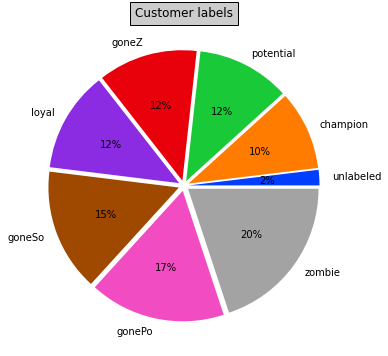

In [ ]:
#pie plot of segmentation label distribution
segmentation_counts = orders_df.groupby('cid').max().reset_index()[['cid','segmentationlabel']].groupby('segmentationlabel').count().reset_index().sort_values('cid')
colors = sns.color_palette('bright')
plt.pie(segmentation_counts.cid, labels=segmentation_counts.segmentationlabel,colors = colors,explode = [0.04]*len(segmentation_counts),
        autopct='%.0f%%', shadow=False)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title("Customer labels", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig('fig3.JPEG', dpi=300)
plt.show()

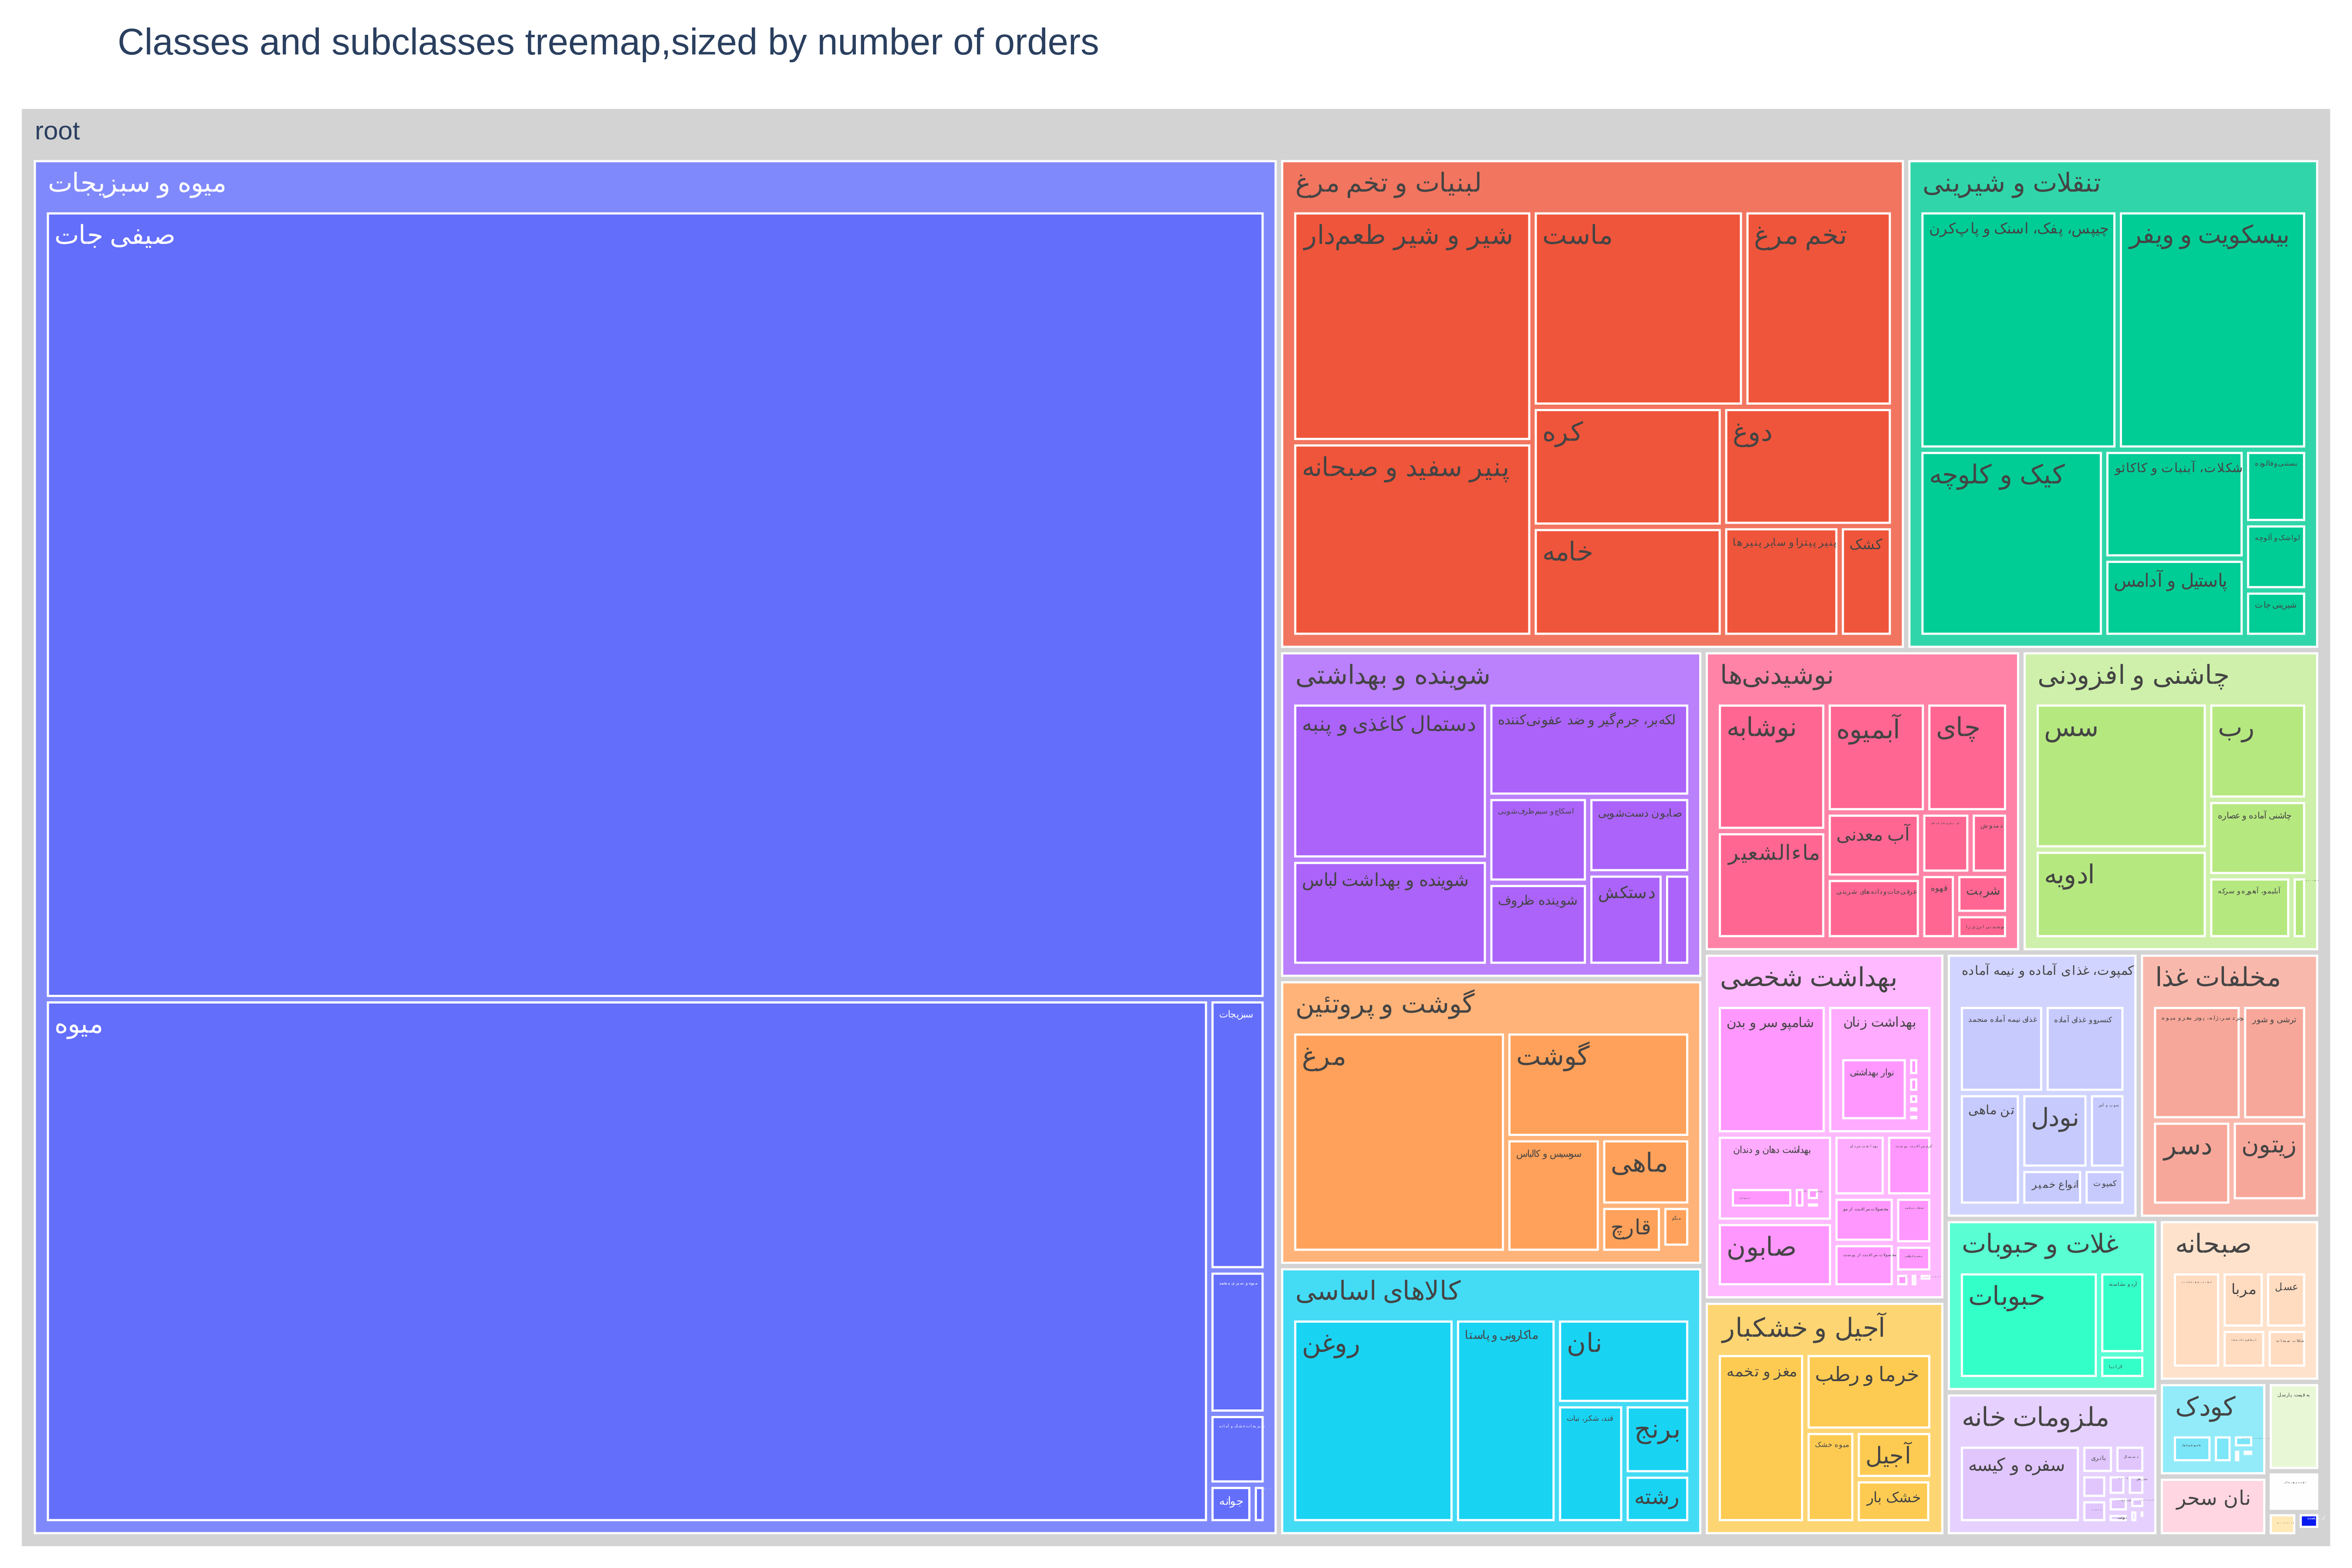

In [5]:
# plot tree-map that each child's size depends on the number of its purchased
ordered_item_counts = orders_df.groupby('classid').count().reset_index()[['classid','iid']].rename(columns = {'iid':'counts'})
ordered_item_counts = pd.merge(class_df , ordered_item_counts,how='left')
ordered_item_counts.counts.fillna(0,inplace = True) 
fig = px.treemap(    names = ordered_item_counts.class_name, parents = ordered_item_counts.parent_name , values = ordered_item_counts['counts'],title='Classes and subclasses treemap,sized by number of orders')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=10, r=10, b=10))
fig.write_image("fig4.png", width=1080, height=720,scale = 5,format = 'png')
fig.show()


In [ ]:
#change format of checkout date from string to time
def str_to_date(row):
    return datetime.strptime(row, "%Y-%m-%d %H:%M:%S.%f")
orders_df['checkoutdate'] = orders_df['checkoutdate'].apply(str_to_date)


In [ ]:
#add two columns that show first-time purchasing related item or category

first_basket = orders_df.groupby(['cid', 'iid'], as_index=False)['checkoutdate'].min()
first_basket.rename(columns={'checkoutdate': 'first_checkout'}, inplace=True)
orders_df = orders_df.merge(first_basket, on=['cid', 'iid'])
# cat_first_checkout
cat_first_checkout = orders_df.groupby(['cid', 'catid'], as_index=False)['checkoutdate'].min()
cat_first_checkout.rename(columns={'checkoutdate': 'cat_first_checkout'}, inplace=True)
orders_df = orders_df.merge(cat_first_checkout, on=['cid', 'catid'])
# class_first_checkout
class_first_checkout = orders_df.groupby(['cid', 'classid'], as_index=False)['checkoutdate'].min()
class_first_checkout.rename(columns={'checkoutdate': 'class_first_checkout'}, inplace=True)
orders_df = orders_df.merge(class_first_checkout, on=['cid', 'classid'])


In [ ]:
#with these functions we check whether this item/category is reordered or not.
#if it isn't first order, then the related column takes 1, otherwise 0
def check_reordered_item(row):
    if row.checkoutdate == row.first_checkout:
        return 0
    return 1
def check_reordered_cat(row):
    if row.checkoutdate == row.cat_first_checkout:
        return 0
    return 1
def check_reordered_class(row):
    if row.checkoutdate == row.class_first_checkout:
        return 0
    return 1
def get_week_day(row):
    return row.weekday()


In [ ]:
orders_df['day_of_week'] = orders_df['checkoutdate'].apply(get_week_day)
orders_df['reordered'] = orders_df.apply(check_reordered_item, axis=1)
orders_df['cat_reordered'] = orders_df.apply(check_reordered_cat, axis=1)
orders_df['class_reordered'] = orders_df.apply(check_reordered_class, axis=1)


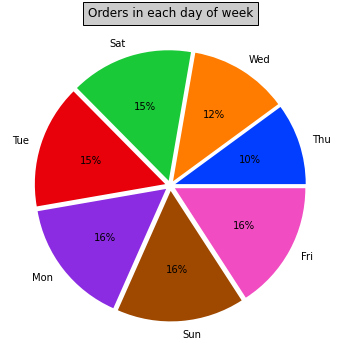

In [ ]:
#pie plot of DOW of checkouts distribution
DOW_counts = orders_df.groupby('day_of_week').count().reset_index().sort_values('cid')[['day_of_week','iid']].rename(columns = {'iid':'counts'})
DOW_counts['day_of_week'] = DOW_counts['day_of_week'].map({0: 'Sun',1: 'Mon', 2 : 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})
colors = sns.color_palette('bright')
plt.pie(DOW_counts.counts, labels=DOW_counts.day_of_week,colors = colors,explode = [0.04]*len(DOW_counts),
        autopct='%.0f%%', shadow=False)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title("Orders in each day of week", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig('fig5.JPEG', dpi=300)
plt.show()

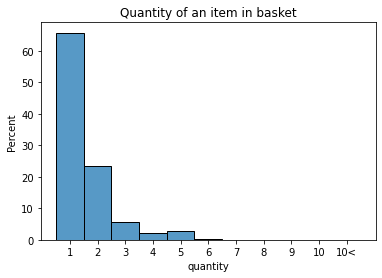

In [ ]:
#plot histogram of Items' Quantity in baskets
def handle_more10(row):
  if row>10:
    return '10<'
  return str(int(row))

quantity_hist = orders_df.__deepcopy__()
quantity_hist['quantity'] = quantity_hist['quantity'].apply(handle_more10)
quantity_hist['quantity'] = pd.Categorical(quantity_hist['quantity'], ['1','2','3','4','5','6','7','8','9','10','10<'])

sns.histplot(data=quantity_hist, x="quantity", stat="percent", discrete=True,binwidth = 1)

plt.title("Quantity of an item in basket")
plt.savefig('fig6.JPEG', dpi=300)
plt.show()

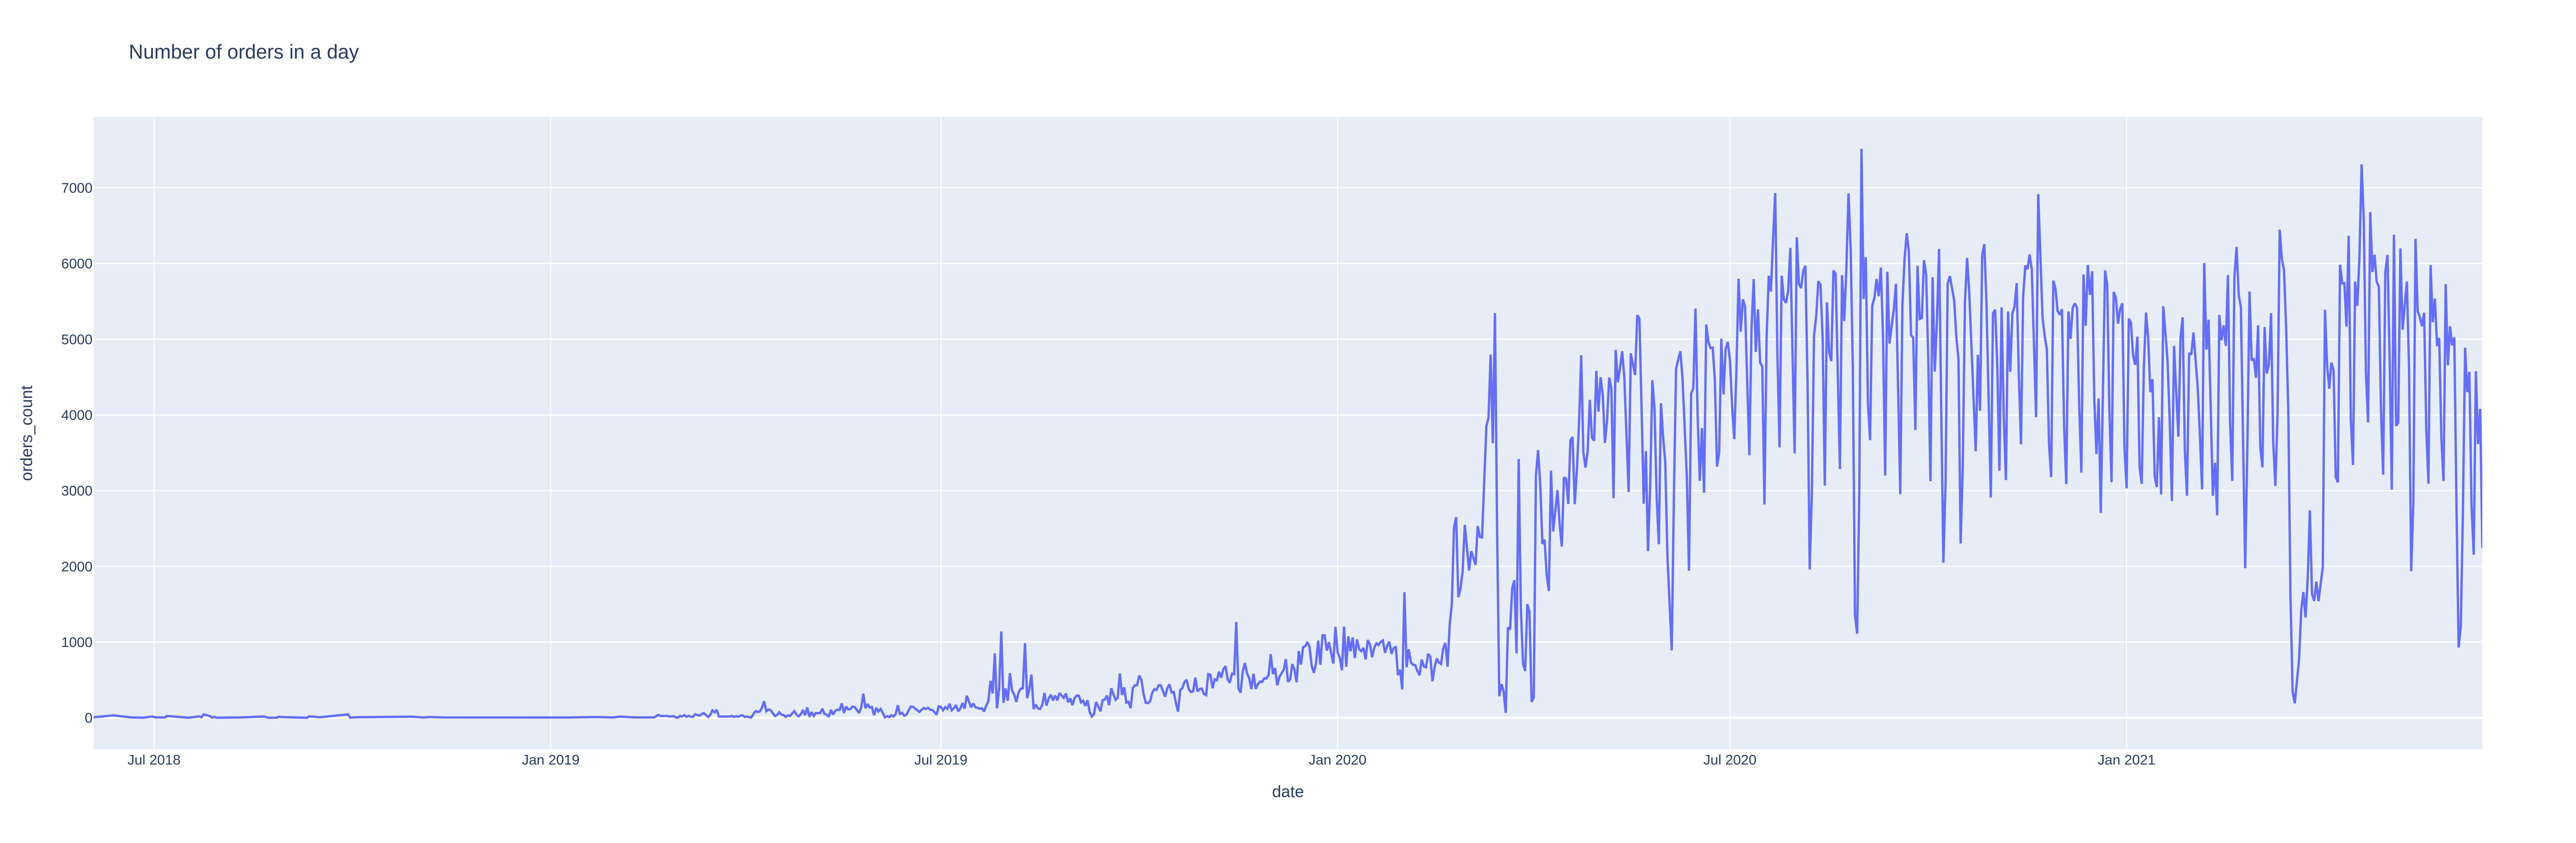

In [6]:
# time series plot for number of orders in a day
time_series_orders = orders_df.__deepcopy__()
def get_date(row):
  return row.date()
time_series_orders['date'] = time_series_orders['checkoutdate'].apply(get_date)
time_series_orders = time_series_orders.groupby('date').count().reset_index()[['date','iid']].rename(columns={'iid':'orders_count'})
fig = px.line(time_series_orders, x='date', y='orders_count',title = 'Number of orders in a day')
fig.write_image("fig7.png", width=2200, height=720,scale = 5 , format = 'png')

fig.show()

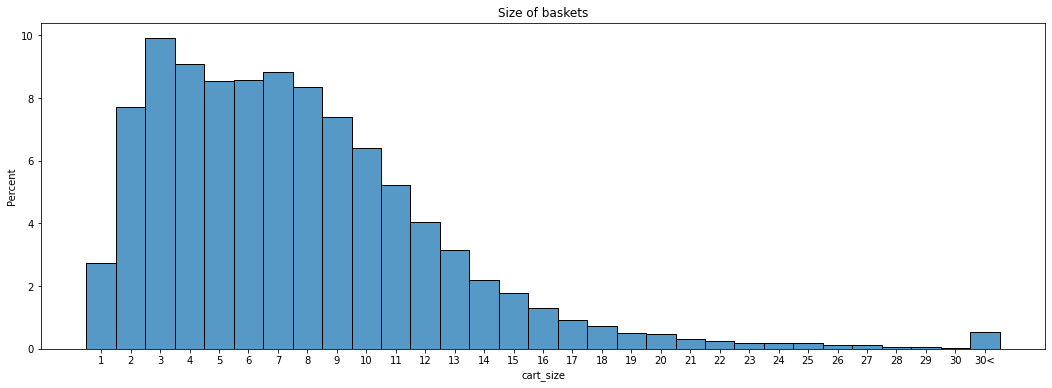

In [ ]:
#plot cart size histogram (number of items in a basket) 
def handle_more10(row):
  if row>30:
    return '30<'
  return str(int(row))

cart_size_hist = orders_df.__deepcopy__()
cart_size_hist = cart_size_hist.groupby(["cid", "bid"])['iid'].count().reset_index(name='cart_size').groupby('cid')['cart_size'].mean().reset_index()
cart_size_hist['cart_size'] = cart_size_hist['cart_size'].apply(handle_more10)
cart_size_hist['cart_size'] = pd.Categorical(cart_size_hist['cart_size'], ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','30<'])

fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(ax=ax ,data=cart_size_hist, x="cart_size", stat="percent", discrete=True,shrink=1)

plt.title("Size of baskets")
plt.savefig('fig8.JPEG', dpi=300)
plt.show()

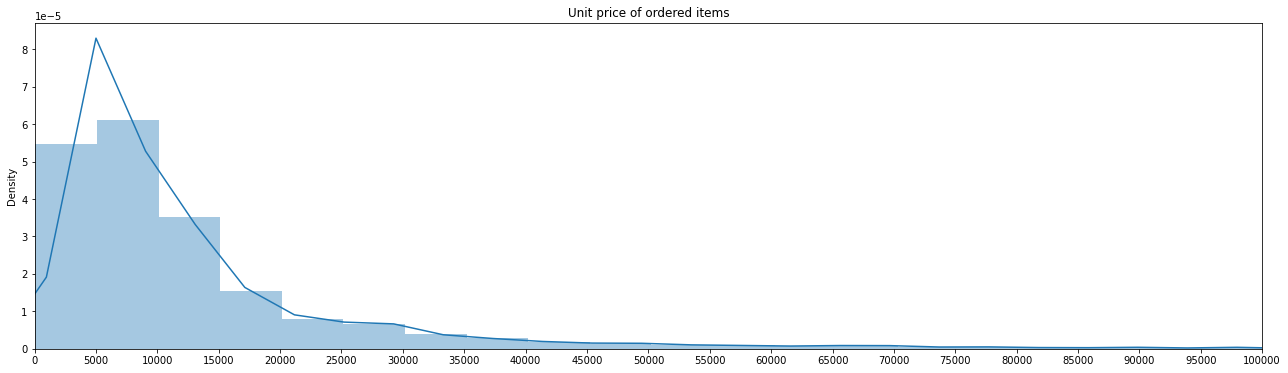

In [ ]:
#distribution of purchased items price

# fig, ax = plt.subplots(figsize=(18,6))
# sns.violinplot(ax=ax, x=orders_df["price"])


# sns.displot(orders_df, x="days", kind="kde", bw_adjust=1, height=10, aspect=4)
# plot distplot

unit_prices = orders_df["price"] / orders_df["quantity"]
fig, ax = plt.subplots(figsize=(22,6))
sns.distplot([unit_prices], ax = ax,bins = 159)
# ax.vlines(unit_prices.mean(), 0,8e-5, color='crimson', ls=':')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5000))
 
# change the limits of X-axis
ax.set_xlim(0, 100000)

plt.title("Unit price of ordered items")
plt.savefig('fig9.JPEG', dpi=300)
plt.show()

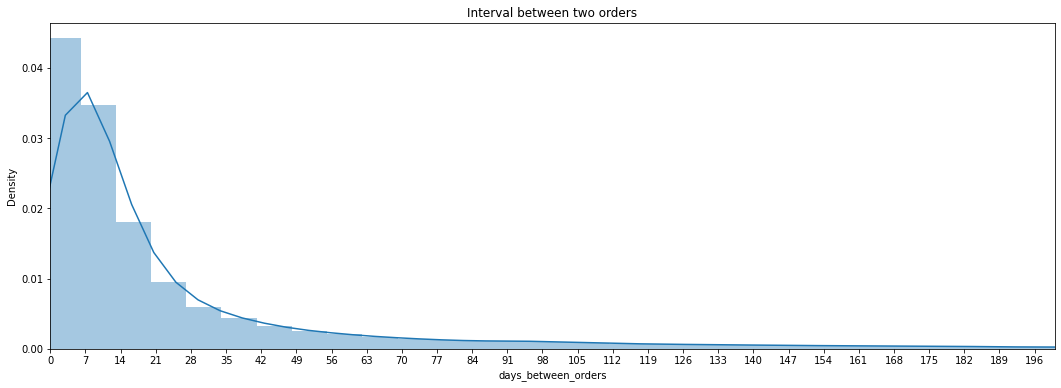

In [ ]:
# distribution of days between orders
df =  orders_df.groupby(["cid", "bid"])['days'].max().reset_index(name='days_of_orders').groupby('cid')['days_of_orders'].diff()
df = pd.DataFrame({'days_between_orders': -df})
df['user_id'] = list(orders_df.groupby(["cid", "bid"])['days'].max().reset_index(level=0)['cid'])
df.dropna(inplace=True)


fig, ax = plt.subplots(figsize=(18,6))
sns.distplot(df.days_between_orders, ax = ax,bins = 121)
# ax.vlines(df.days_between_orders.mean(), 0,0.04, color='crimson', ls=':')
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.set_xlim(0, 200)

plt.title("Interval between two orders")
plt.savefig('fig10.JPEG', dpi=300)
plt.show()


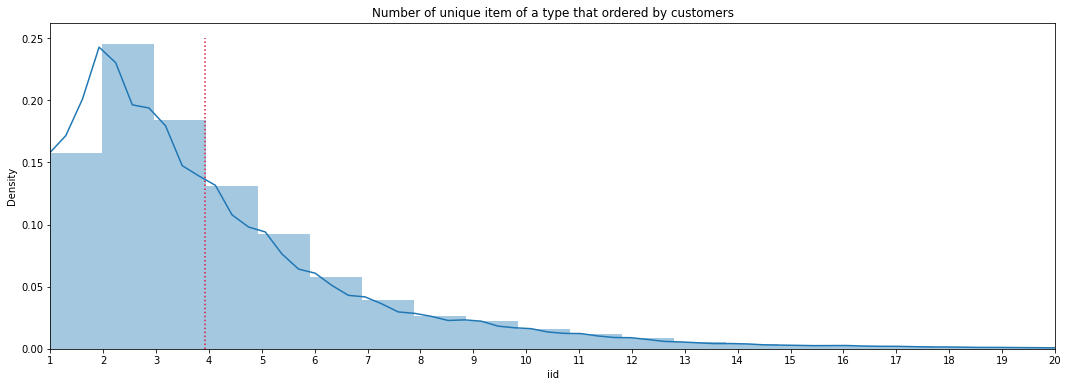

In [ ]:
#number of unique items from a category that ordered by a customer (among categories that purchased more than 10 times by the customer)
cat_counts = orders_df.groupby(['cid','catid']).count()[['iid']]
most_ordered_cat = cat_counts[cat_counts.iid > 10].reset_index()

lisa =[]
for i in most_ordered_cat.index:
  lisa.append((most_ordered_cat.loc[i]['cid'] , most_ordered_cat.loc[i]['catid']))

most_ordered_cat = orders_df[orders_df.set_index(['cid','catid']).index.isin(lisa)]
most_ordered_cat = most_ordered_cat.groupby(['cid','catid']).nunique()[['iid']]


fig, ax = plt.subplots(figsize=(18,6))
sns.distplot(most_ordered_cat.iid, ax = ax,bins = 61)
ax.set_xlim(1, 20)

ax.vlines(most_ordered_cat.iid.mean(), 0, 0.25, color='crimson', ls=':')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("Number of unique item of a type that ordered by customers")
plt.savefig('fig11.JPEG', dpi=300)
plt.show()


In [ ]:
#scatter plot
#shows days between orders and number of orders for each segmentation label
df = orders_df.groupby(["cid", "bid"])['days'].max().reset_index(name='days_of_orders').groupby('cid')['days_of_orders'].diff()
df = pd.DataFrame({'days_between_orders': -df})
df['user_id'] = list(orders_df.groupby(["cid", "bid"])['days'].max().reset_index(level=0)['cid'])
df.dropna(inplace=True)
df = df.groupby('user_id', as_index=False)['days_between_orders'].mean()
df2 = orders_df.drop_duplicates(['cid','bid'])
df2 = df2.groupby('cid').count().reset_index()[['cid','bid']].rename(columns={'cid':'user_id','bid':'number of orders'})
df3 = orders_df.drop_duplicates('cid')[['cid','segmentationlabel']].rename(columns={'cid':'user_id'})
merged_df = pd.merge(df,df2)
merged_df = pd.merge(merged_df,df3)

In [ ]:
merged_df

user_id  days_between_orders  number of orders segmentationlabel
0            4            15.537037                55          champion
1            7            53.400000                16             goneZ
2            8            58.000000                 6         unlabeled
3           10            27.862069                30          champion
4           12            17.068182                45          champion
...        ...                  ...               ...               ...
25851  2080464             5.500000                 3         unlabeled
25852  2082906             4.000000                 4            gonePo
25853  2087385             5.500000                 3         unlabeled
25854  2089544             0.000000                 3            gonePo
25855  2090404             3.500000                 5            gonePo

[25856 rows x 4 columns]

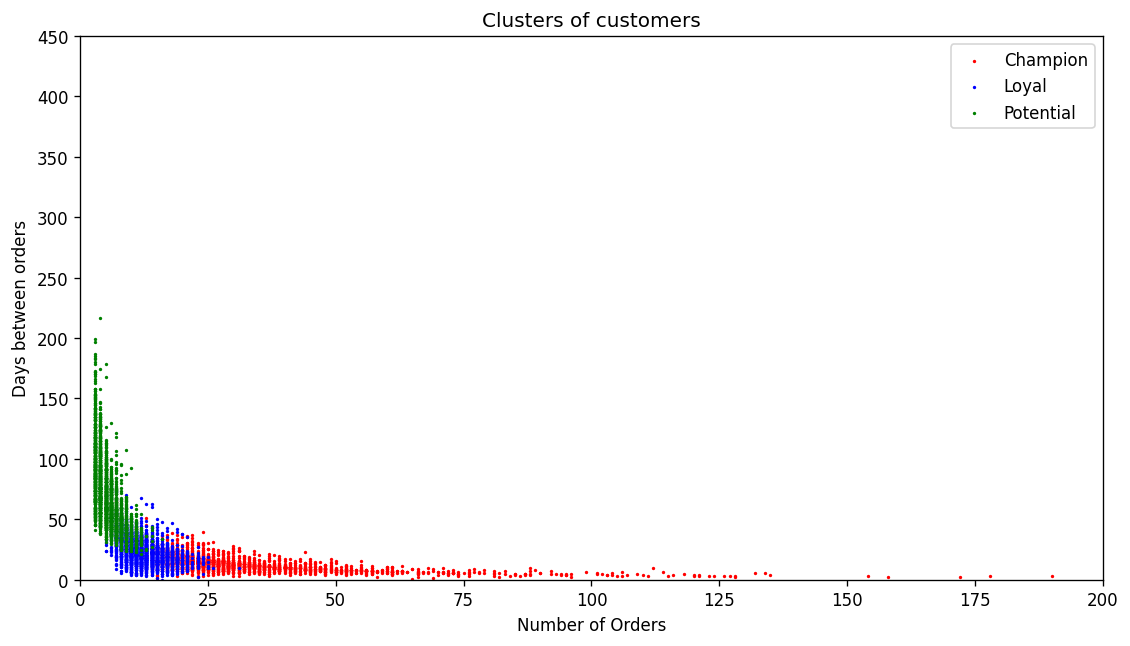

In [ ]:
data_size=1
# centroid_size=50
plt.figure(figsize=(11,6), dpi=120)
plt.scatter(merged_df[merged_df.segmentationlabel  == 'champion'].iloc[:,2], merged_df[(merged_df.segmentationlabel  == 'champion')].iloc[:,1], s = data_size, c = 'red', label = 'Champion')
plt.scatter(merged_df[merged_df.segmentationlabel  == 'loyal'].iloc[:,2], merged_df[merged_df.segmentationlabel  == 'loyal'].iloc[:,1], s = data_size, c = 'blue', label = 'Loyal')
plt.scatter(merged_df[merged_df.segmentationlabel  == 'potential'].iloc[:,2], merged_df[merged_df.segmentationlabel  == 'potential'].iloc[:,1], s = data_size, c = 'green', label = 'Potential')
# plt.scatter(merged_df[merged_df.segmentationlabel  == 'zombie'].iloc[:,2], merged_df[merged_df.segmentationlabel  == 'zombie'].iloc[:,1], s = data_size, c = 'cyan', label = 'Zombie')
# plt.scatter(merged_df[merged_df.segmentationlabel  == 'unlabeled'].iloc[:,2], merged_df[merged_df.segmentationlabel  == 'unlabeled'].iloc[:,1], s = data_size, c = 'magenta', label = 'unlabeled')
plt.title('Clusters of customers')
plt.xlabel('Number of Orders')
plt.ylabel('Days between orders')
plt.legend()
plt.xlim(0,200)
plt.ylim(0,450)
plt.savefig('fig13.png', dpi=120)
plt.show()

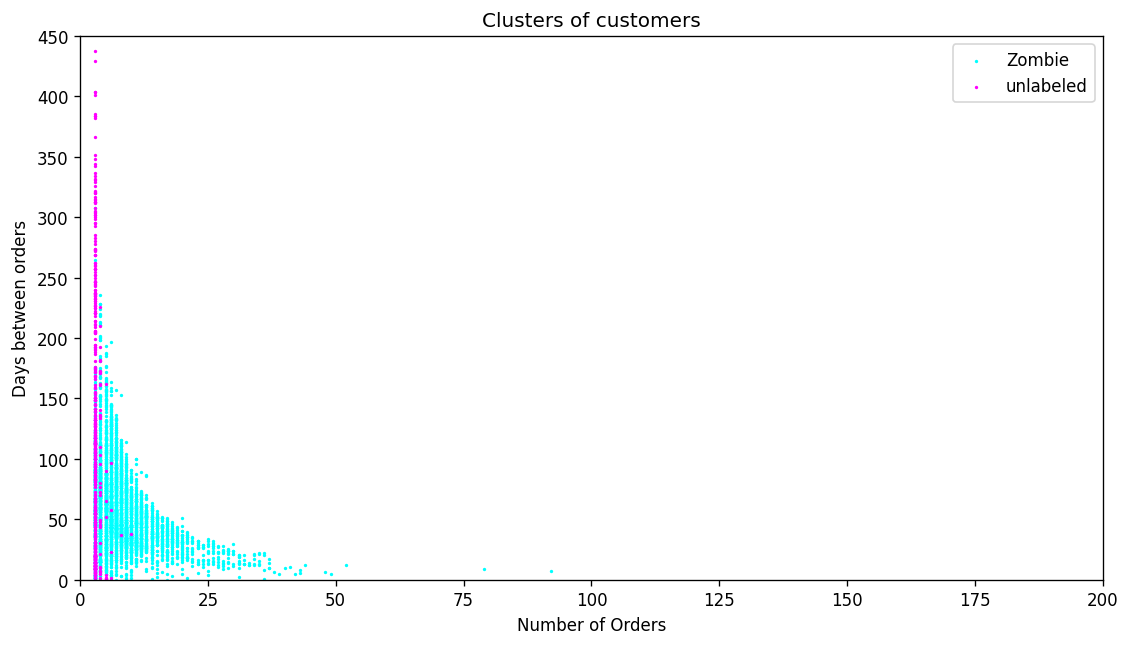

In [ ]:
data_size=1
# centroid_size=50
plt.figure(figsize=(11,6), dpi=120)
# plt.scatter(merged_df[merged_df.segmentationlabel  == 'champion'].iloc[:,2], merged_df[(merged_df.segmentationlabel  == 'champion')].iloc[:,1], s = data_size, c = 'red', label = 'Champion')
# plt.scatter(merged_df[merged_df.segmentationlabel  == 'loyal'].iloc[:,2], merged_df[merged_df.segmentationlabel  == 'loyal'].iloc[:,1], s = data_size, c = 'blue', label = 'Loyal')
# plt.scatter(merged_df[merged_df.segmentationlabel  == 'potential'].iloc[:,2], merged_df[merged_df.segmentationlabel  == 'potential'].iloc[:,1], s = data_size, c = 'green', label = 'Potential')
plt.scatter(merged_df[merged_df.segmentationlabel  == 'zombie'].iloc[:,2], merged_df[merged_df.segmentationlabel  == 'zombie'].iloc[:,1], s = data_size, c = 'cyan', label = 'Zombie')
plt.scatter(merged_df[merged_df.segmentationlabel  == 'unlabeled'].iloc[:,2], merged_df[merged_df.segmentationlabel  == 'unlabeled'].iloc[:,1], s = data_size, c = 'magenta', label = 'unlabeled')
plt.title('Clusters of customers')
plt.xlabel('Number of Orders')
plt.ylabel('Days between orders')
plt.legend()
plt.xlim(0,200)
plt.ylim(0,450)
plt.savefig('fig14.png', dpi=120)
plt.show()

In [ ]:
#box plot 
#basket price of each segmentation label
df1 = orders_df.groupby("cid").sum().reset_index()[['cid','price']].rename(columns={'cid':'user_id','price':'total_spending'}).sort_values('user_id')
df2 = orders_df.drop_duplicates(['cid','bid'])
df2 = df2.groupby('cid').count().reset_index()[['cid','bid']].rename(columns={'cid':'user_id','bid':'number of orders'}).sort_values('user_id')
df1['average_cart_cost'] = df1.total_spending/df2['number of orders']
df3 = orders_df.drop_duplicates('cid')[['cid','segmentationlabel']].rename(columns={'cid':'user_id'})
merged_df1 = pd.merge(df1,df3)
merged_df1 = merged_df1[merged_df.segmentationlabel.isin(['champion','loyal','zombie','potential','unlabeled'])]

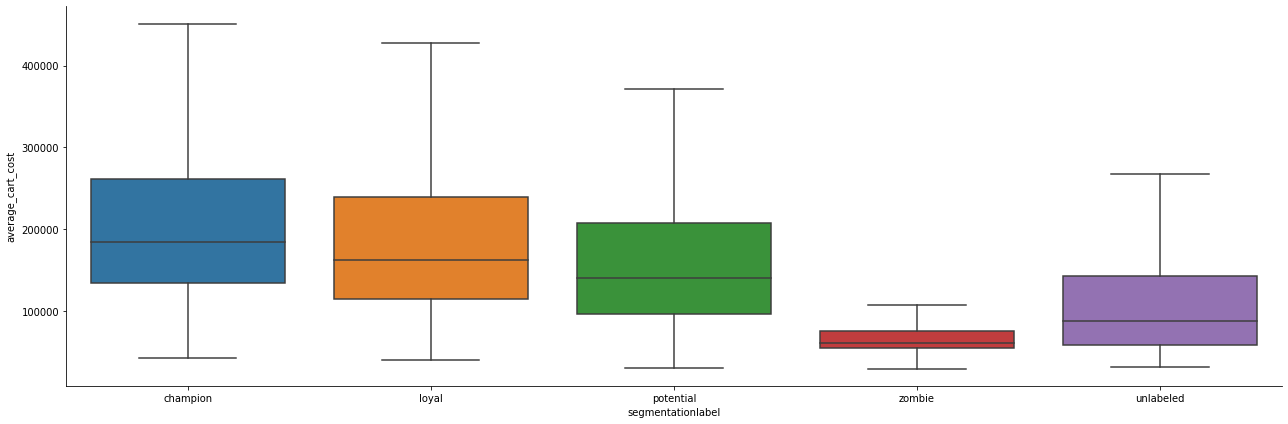

In [ ]:
sns.catplot(x="segmentationlabel", y="average_cart_cost", kind="box", data=merged_df1,showfliers=False, height=6, aspect=3,order = ['champion','loyal','potential','zombie','unlabeled'])
plt.savefig('fig15.png')
plt.show()

In [7]:
%%html
<!DOCTYPE html><html><body align="right"><br><div style="direction:;ltr"><p style="background-color: #F7FFCA; color:black; border:1px solid black; border-radius: 10px; font-size:32px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 15px;" >
Set labels and split prior data

In [ ]:
# 1 for an item that is reordered in the last basket and 0 for otherwise
def reordered_label(row):
    if row.checkoutdate == row.last_basket_date:
        return 1
    return 0

# split last basket for prediction and other for creating features
def split_prior_data(orders_dff):
    last_basket = orders_dff.groupby(['cid'], as_index=False)['days'].min()
    last_basket.rename(columns={'days': 'prior_last_basket'}, inplace=True)
    orders_dff = orders_dff.merge(last_basket, on=['cid'])

    last_basket_date = orders_dff.groupby(['cid'], as_index=False)['checkoutdate'].max()
    last_basket_date.rename(columns={'checkoutdate': 'last_basket_date'}, inplace=True)
    orders_dff = orders_dff.merge(last_basket_date, on=['cid'])

    orders_dff['days'] -= orders_dff['prior_last_basket']
    orders_dff['prior_last_basket'] = 0

    orders_dff.sort_values(by=['cid', 'checkoutdate'], inplace=True)
    last_bid = orders_dff.drop_duplicates(subset=['cid'], keep='last')
    prior_data = orders_dff[~orders_dff['bid'].isin(last_bid['bid'])]

    train_validation_data = orders_dff
    train_validation_data.sort_values(by=['cid', 'checkoutdate'], inplace=True)
    train_validation_data = train_validation_data[(((train_validation_data['reordered'] == 1) &
                                                    (train_validation_data['checkoutdate'] ==
                                                     train_validation_data['last_basket_date']))
                                                   | (train_validation_data['checkoutdate'] !=
                                                      train_validation_data['last_basket_date']))]
    train_validation_data.drop_duplicates(inplace=True, subset=['cid', 'iid'], keep='last')
    del train_validation_data['bid']
    train_validation_data = train_validation_data.merge(last_bid[['cid', 'bid']], on='cid')
    train_validation_data['reorder_label'] = train_validation_data.apply(reordered_label, axis=1)

    del prior_data['last_basket_date']
    del prior_data['prior_last_basket']
    return prior_data, train_validation_data[['cid', 'bid', 'iid', 'catid', 'classid', 'reorder_label']]


prior_data_n_1, test_validation_data = split_prior_data(orders_df.__deepcopy__())
prior_data_n_2, train_validation_data = split_prior_data(prior_data_n_1.__deepcopy__())


In [8]:
%%html
<!DOCTYPE html><html><body align="right"><br><div style="direction:;ltr"><p style="background-color: #F7FFCA; color:black; border:1px solid black; border-radius: 10px; font-size:32px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 15px;" >
Generate Features

In [ ]:
def generate_user_features(prior_data):
    user_features = pd.DataFrame(columns=['user_id'])
    user_features['user_id'] = prior_data['cid'].sort_values().unique()
    user_reorder_rate = prior_data.groupby(["cid", "reordered"])['reordered'].count().groupby(level=0).apply(
        lambda x: x / float(x.sum())).reset_index(name='reorder_rate')
    user_reorder_rate = user_reorder_rate.pivot(index='cid', columns='reordered', values=['reorder_rate'])
    user_reorder_rate = pd.DataFrame(user_reorder_rate.to_records())
    user_reorder_rate.columns = ['user_id', '0', '1']
    user_reorder_rate.set_index("user_id", inplace=True)
    user_reorder_rate.fillna(0, inplace=True)
    user_reorder_rate.reset_index(inplace=True)
    user_features['user_reorder_rate'] = user_reorder_rate['1']

    # Get count of all unique products for every user
    user_features['user_unique_products'] = \
        prior_data.groupby(["cid"])['iid'].nunique().reset_index(name='unique')['unique']

    # Get count of all products ordered by user
    user_features['user_total_products'] = prior_data.groupby(["cid"])['iid'].size().reset_index(name='count')['count']

    # Get mean products per user = Average cart size of user
    df = prior_data.groupby(["cid", "bid"])['iid'].count().reset_index(name='cart_size') \
        .groupby('cid')['cart_size'].mean().reset_index()
    user_features['user_avg_cart_size'] = df['cart_size']

    # Get average days between 2 orders for every user
    df = \
        prior_data.groupby(["cid", "bid"])['days'].max().reset_index(name='days_of_orders') \
            .groupby('cid')['days_of_orders'].diff()
    df = pd.DataFrame({'days_between_orders': -df})
    df['user_id'] = list(prior_data.groupby(["cid", "bid"])['days'].max().reset_index(level=0)['cid'])
    df.dropna(inplace=True)
    df = df.groupby('user_id', as_index=False)['days_between_orders'].mean()

    user_features = user_features.merge(df, on='user_id')

    
    # number of unique products reordered / number of unique products ordered

    df = prior_data.groupby(["cid"])['iid'].nunique().reset_index(name='user_unique_products')
    df = df.merge(prior_data[prior_data['reordered'] == 1].groupby(["cid"])['iid'].nunique().reset_index(
        name='user_reordered_products'), on='cid')
    df.fillna(0, inplace=True)
    df['user_reordered_products_ratio'] = df['user_reordered_products'] / df['user_unique_products']
    del df['user_unique_products']

    user_features = user_features.merge(df, left_on='user_id', right_on='cid')
    del user_features['cid']

    # get user cats reorder ratio
    # number of unique cats reordered / number of unique cats ordered

    df = prior_data.groupby(["cid"])['catid'].nunique().reset_index(name='user_unique_cats')
    df = df.merge(prior_data[prior_data['reordered'] == 1].groupby(["cid"])['catid'].nunique().reset_index(
        name='user_reordered_cats'), on='cid')
    df.fillna(0, inplace=True)
    df['user_reordered_cats_ratio'] = df['user_reordered_cats'] / df['user_unique_cats']
    user_features = user_features.merge(df, left_on='user_id', right_on='cid')
    del user_features['cid']

    # get user classes reorder ratio
    # number of unique classes reordered / number of unique classes ordered
    df = prior_data.groupby(["cid"])['classid'].nunique().reset_index(name='user_unique_classes')
    df = df.merge(prior_data[prior_data['reordered'] == 1].groupby(["cid"])['classid'].nunique().reset_index(
        name='user_reordered_classes'), on='cid')
    df.fillna(0, inplace=True)
    df['user_reordered_classes_ratio'] = df['user_reordered_classes'] / df['user_unique_classes']
    user_features = user_features.merge(df, left_on='user_id', right_on='cid')
    del user_features['cid']

    return user_features


user_features_n_1 = generate_user_features(prior_data_n_1)
user_features_n_2 = generate_user_features(prior_data_n_2)

In [ ]:
#  Product Features :
def generate_product_features(prior_data):
    # create an empty dataframe
    product_features = pd.DataFrame(columns=['iid'])

    # add product_name
    product_features['iid'] = prior_data['iid'].sort_values().unique()

    # get reorder_rate for each product
    # reorder_rate = reorders / total orders
    df = pd.DataFrame({'reorder_rate': prior_data.groupby(['iid', 'reordered'])['reordered'].\
                      count().groupby(level=0).apply(lambda x: x / float(x.sum()))}).reset_index()

    # get data of reordered products only
    new_df = df[df['reordered'] == 1]
    new_df['reorder_rate'] = new_df['reorder_rate'] * new_df['reordered']

    # handling for products which were never reordered, hence reorder_rate = 0.0
    new_df_1 = df[(df['reordered'] == 0) & (df['reorder_rate'] == float(1.0))]
    new_df_1['reorder_rate'] = new_df_1['reorder_rate'] * new_df_1['reordered']
    new_df = new_df.append(new_df_1)

    # drop other columns of the new_df and sort values by product name to align with product features dataframe
    new_df.drop('reordered', axis=1, inplace=True)
    new_df.sort_values(by='iid', inplace=True)
    new_df = new_df.reset_index(drop=True)

    # add to feat_1 of product_features dataframe
    product_features['product_reorder_rate'] = new_df['reorder_rate']

    #  generate boolean values if product belongs to below classes

    products = orders_df[['iid', 'classid', 'catid']].drop_duplicates().reset_index()

    # from collections import Counter

    products['isMilk'] = products['classid'].apply(lambda x: x == 51).astype(int)
    products['isSeifijat'] = products['classid'].apply(lambda x: x == 57).astype(int)
    products['isFruits'] = products['classid'].apply(lambda x: x == 21).astype(int)
    products['isLabaniat'] = products['classid'].apply(lambda x: x == 2 or x == 55).astype(int)
    products['isProtein'] = products['classid'].apply(lambda x: x == 156 or x == 68).astype(int)
    products['isSnack'] = products['classid'].apply(lambda x: x == 131 or x == 132 or x == 133).astype(int)
    products['isKalayeAsasi'] = products['classid'].apply(
        lambda x: x == 9 or x == 45 or x == 92 or x == 69 or x == 71).astype(int)

    new_product_feat = products[
        ['isMilk', 'isSeifijat', 'isFruits', 'isLabaniat', 'isProtein', 'isSnack', 'isKalayeAsasi']]

    # reduce sparsity using NMF
    # ref:https://www.kaggle.com/themissingsock/matrix-decomposition-with-buyer-data

    nmf = NMF(n_components=3)
    model = nmf.fit(new_product_feat)
    W = model.transform(new_product_feat)
    prod_data = pd.DataFrame(normalize(W))

    prod_data.columns = ['p_reduced_feat_1', 'p_reduced_feat_2', 'p_reduced_feat_3']
    products.drop(['isMilk', 'isSeifijat', 'isFruits', 'isLabaniat', 'isProtein', 'isSnack', 'isKalayeAsasi'],
                  axis=1, inplace=True)

    product_features['p_reduced_feat_1'] = prod_data['p_reduced_feat_1']
    product_features['p_reduced_feat_2'] = prod_data['p_reduced_feat_2']
    product_features['p_reduced_feat_3'] = prod_data['p_reduced_feat_3']

    # merge dept_reorder_rate and aisle_reorder_rate to existing product features

    del df, new_df, new_df_1, new_product_feat, model, prod_data
    return product_features



In [ ]:

#  Class Features :
def generate_cat_features(prior_data):
    # create an empty dataframe
    cat_features = pd.DataFrame(columns=['catid'])

    # add product_name
    cat_features['catid'] = prior_data['catid'].sort_values().unique()

    # get reorder_rate for each product
    # reorder_rate = reorders / total orders
    df = pd.DataFrame({'cat_reorder_rate': prior_data.groupby(['catid', 'cat_reordered'])['cat_reordered'].
                      count().groupby(level=0).apply(lambda x: x / float(x.sum()))}).reset_index()

    # get data of reordered products only
    new_df = df[df['cat_reordered'] == 1]
    new_df['cat_reorder_rate'] = new_df['cat_reorder_rate'] * new_df['cat_reordered']

    # handling for products which were never reordered, hence reorder_rate = 0.0
    new_df_1 = df[(df['cat_reordered'] == 0) & (df['cat_reorder_rate'] == float(1.0))]
    new_df_1['cat_reorder_rate'] = new_df_1['cat_reorder_rate'] * new_df_1['cat_reordered']
    new_df = new_df.append(new_df_1)

    # drop other columns of the new_df and sort values by product name to align with product features dataframe
    new_df.drop('cat_reordered', axis=1, inplace=True)
    new_df.sort_values(by='catid', inplace=True)
    new_df = new_df.reset_index(drop=True)

    # add to feat_1 of product_features dataframe
    cat_features['cat_reorder_rate'] = new_df['cat_reorder_rate']

    # merge dept_reorder_rate and aisle_reorder_rate to existing product features

    del df, new_df, new_df_1
    return cat_features



In [ ]:

def generate_user_product_features(prior_data):
    # create an empty dataframe
    user_product_features = pd.DataFrame(columns=['cid', 'iid'])

    # get unique user-product pairs ( total data is reduced by 60 %)
    # prior_train_orders.groupby(["user_id","product_id"]).size().shape[0]/prior_train_orders.shape[0]  - 0.409
    # add user and product to dataframe
    u_p = prior_data.groupby(["cid", "iid"]).size().reset_index()
    user_product_features["cid"] = u_p["cid"]
    user_product_features["iid"] = u_p["iid"]

    # How frequently user ordered the product ?
    # #times user ordered the product/ #times user placed an order
    df = prior_data.groupby(["cid", "iid"])["reordered"].size()
    df = df / prior_data.groupby(["cid"]).size()
    df = df.reset_index(name='order_rate')
    df.fillna(0., inplace=True)
    user_product_features["u_p_order_rate"] = df["order_rate"]

    # How frequently user reordered the product ?
    # #times user reordered the product/ #times user ordered the product
    df = prior_data[prior_data["reordered"] == 1].groupby(["cid", "iid"])["reordered"].size()
    df = df / prior_data.groupby(["cid", "iid"]).size()
    df = df.reset_index(name='reorder_rate')
    df.fillna(0., inplace=True)
    user_product_features["u_p_reorder_rate"] = df["reorder_rate"]

    # Number of orders placed since the product was last ordered ?

    #  Get Number of orders
    prior_data_order_number = prior_data.groupby('cid').apply(
        lambda x: x.drop_duplicates(subset='bid').reset_index(drop=True).
            reset_index()[['cid', 'bid', 'index']].merge(x, on=['cid', 'bid'])).reset_index(drop=True)

    prior_data_order_number = prior_data_order_number.rename({'index': 'order_number'}, axis='columns')

    # Get last order_number placed by user , subtract with last order_number with the PRODUCT in cart
    df = prior_data_order_number.groupby(["cid", "iid"])['order_number'].max().reset_index()
    df_2 = prior_data_order_number.groupby(["cid"])['order_number'].max().reset_index()
    new_df = pd.merge(df, df_2, how='outer', left_on=['cid'], right_on=['cid'])
    new_df['order_number_diff'] = new_df['order_number_y'] - new_df['order_number_x']
    user_product_features['u_p_orders_since_last'] = new_df['order_number_diff']

    # Get last order_number placed by user , subtract with last order_number with the CAT in cart
    df = prior_data_order_number.groupby(["cid", "catid"])['order_number'].max().reset_index()
    df_2 = prior_data_order_number.groupby(["cid"])['order_number'].max().reset_index()
    new_df = pd.merge(df, df_2, how='outer', left_on=['cid'], right_on=['cid'])
    new_df['order_number_diff'] = new_df['order_number_y'] - new_df['order_number_x']
    user_product_features['u_t_orders_since_last'] = new_df['order_number_diff']

    # Get last order_number placed by user , subtract with last order_number with the CLASS in cart
    df = prior_data_order_number.groupby(["cid", "classid"])['order_number'].max().reset_index()
    df_2 = prior_data_order_number.groupby(["cid"])['order_number'].max().reset_index()
    new_df = pd.merge(df, df_2, how='outer', left_on=['cid'], right_on=['cid'])
    new_df['order_number_diff'] = new_df['order_number_y'] - new_df['order_number_x']
    user_product_features['u_c_orders_since_last'] = new_df['order_number_diff']

    # max_streak
    def max_streak(row):
        #  Function to calculate the maximum number of orders in a row which contains reorders of a product
        maxx = 0
        summ = 0
        for i in range(len(row) - 1):
            if row[i + 1] - row[i] == 1:
                summ += 1
            else:
                if summ > maxx:
                    maxx = summ
                summ = 0
        return maxx

    df = prior_data_order_number.groupby(["cid", "iid"])['order_number'].apply(list).reset_index(name='max_streak')

    df['max_streak'] = [max_streak(df['max_streak'].iloc[i]) for i in range(len(df))]
    user_product_features = pd.merge(user_product_features, df, on=["cid", "iid"])

    del df, new_df, df_2, prior_data_order_number
    return user_product_features



In [ ]:

def generate_user_cat_features(prior_data):
    # create an empty dataframe
    user_cat_features = pd.DataFrame(columns=['cid', 'catid'])

    # get unique user-product pairs ( total data is reduced by 60 %)
    # prior_train_orders.groupby(["user_id","product_id"]).size().shape[0]/prior_train_orders.shape[0]  - 0.409
    # add user and product to dataframe
    u_t = prior_data.groupby(["cid", "catid"]).size().reset_index()
    user_cat_features["cid"] = u_t["cid"]
    user_cat_features["catid"] = u_t["catid"]

    # How frequently user ordered the product ?
    # #times user ordered the product/ #times user placed an order
    df = prior_data.groupby(["cid", "catid"])["cat_reordered"].size()
    df = df / prior_data.groupby(["cid"]).size()
    df = df.reset_index(name='order_rate')
    df.fillna(0., inplace=True)
    user_cat_features["u_t_order_rate"] = df["order_rate"]

    # How frequently user reordered the product ?
    # #times user reordered the product/ #times user ordered the product
    df = prior_data[prior_data["cat_reordered"] == 1].groupby(["cid", "catid"])["cat_reordered"].size()
    df = df / prior_data.groupby(["cid", "catid"]).size()
    df = df.reset_index(name='reorder_rate')
    df.fillna(0., inplace=True)
    user_cat_features["u_t_reorder_rate"] = df["reorder_rate"]

    # Number of orders placed since the product was last ordered ?

    #  Get Number of orders
    prior_data_order_number = prior_data.groupby('cid').apply(
        lambda x: x.drop_duplicates(subset='bid').reset_index(drop=True).
            reset_index()[['cid', 'bid', 'index']].merge(x, on=['cid', 'bid'])).reset_index(drop=True)

    prior_data_order_number = prior_data_order_number.rename({'index': 'order_number'}, axis='columns')

    # max_streak
    def max_streak(row):
        #  Function to calculate the maximum number of orders in a row which contains reorders of a product
        maxx = 0
        summ = 0
        for i in range(len(row) - 1):
            if row[i + 1] - row[i] == 1:
                summ += 1
            else:
                if summ > maxx:
                    maxx = summ
                summ = 0
        return maxx

    df = prior_data_order_number.groupby(["cid", "catid"])['order_number'].apply(list).reset_index(name='max_streak_cat')

    df['max_streak_cat'] = [max_streak(df['max_streak_cat'].iloc[i]) for i in range(len(df))]
    user_product_features = pd.merge(user_cat_features, df, on=["cid", "catid"])

    del df, prior_data_order_number
    return user_product_features




In [ ]:
product_features_n_1 = generate_product_features(prior_data_n_1)
product_features_n_2 = generate_product_features(prior_data_n_2)

cat_features_n_1 = generate_cat_features(prior_data_n_1)
cat_features_n_2 = generate_cat_features(prior_data_n_2)

user_cat_features_n_1 = generate_user_cat_features(prior_data_n_1)
user_cat_features_n_2 = generate_user_cat_features(prior_data_n_2)

user_product_features_n_1 = generate_user_product_features(prior_data_n_1)
user_product_features_n_2 = generate_user_product_features(prior_data_n_2)



In [ ]:

"""
feature : how frequently product was reordered on any given hour ?
"""


def product_day(prior_data):
    df = prior_data.groupby(['iid', 'day_of_week'])["reordered"].size()
    df = df / prior_data.groupby(["iid"]).size()
    df = df.reset_index(name='product_week_reorder_rate')
    return df


def cat_day(prior_data):
    df = prior_data.groupby(['catid', 'day_of_week'])["cat_reordered"].size()
    df = df / prior_data.groupby(["catid"]).size()
    df = df.reset_index(name='cat_week_reorder_rate')
    return df


def class_day(prior_data):
    df = prior_data.groupby(['classid', 'day_of_week'])["class_reordered"].size()
    df = df / prior_data.groupby(["classid"]).size()
    df = df.reset_index(name='class_week_reorder_rate')
    return df


def get_days_since_prior(orders_dff):
    customer_order_days = orders_dff.sort_values(by='checkoutdate').groupby(["cid", "bid"], as_index=False)['days'].max()
    df = customer_order_days.groupby(['cid']).diff()['days']
    df = pd.DataFrame({'days_since_prior_order': -df})
    df[['cid', 'bid']] = customer_order_days[['cid', 'bid']]
    df.dropna(inplace=True)
    df['days_since_prior_order'] = df['days_since_prior_order'].astype(int)
    days_since_prior = df.merge(orders_dff, on=['cid', 'bid'])
    return days_since_prior


# last_cid_so_prior = days_since_prior.drop_duplicates(subset=['cid'], keep='last')


test_days_since_prior = get_days_since_prior(orders_df.__deepcopy__())
train_days_since_prior = get_days_since_prior(prior_data_n_1.__deepcopy__())

train_validation_data = train_validation_data.merge(train_days_since_prior[['cid', 'bid', 'days_since_prior_order',
                                                                            'day_of_week', 'checkoutdate']],
                                                    on=['cid', 'bid'])
train_validation_data.drop_duplicates(inplace=True)
train_days_since_prior = train_days_since_prior[~train_days_since_prior['bid'].isin(train_validation_data['bid'])]

test_validation_data = test_validation_data.merge(
    test_days_since_prior[['cid', 'bid', 'days_since_prior_order', 'day_of_week', 'checkoutdate']],
    on=['cid', 'bid'])
test_validation_data.drop_duplicates(inplace=True)
test_days_since_prior = test_days_since_prior[~test_days_since_prior['bid'].isin(test_validation_data['bid'])]




In [ ]:
def product_days_since_prior(days_since_prior):
    """
       feature: how frequently a product was reordered  given that
               difference between 2 orders containing product in days ?
    """
    df = days_since_prior.groupby(['iid', 'days_since_prior_order'])["reordered"].size()
    df = df / days_since_prior.groupby(["iid"]).size()
    df = df.reset_index(name='p_days_since_prior_order_reorder_rate')

    return df


def cat_days_since_prior(days_since_prior):
    df = days_since_prior.groupby(['catid', 'days_since_prior_order'])["cat_reordered"].size()
    df = df / days_since_prior.groupby(["catid"]).size()
    df = df.reset_index(name='t_days_since_prior_order_reorder_rate')

    return df


def class_days_since_prior(days_since_prior):
    df = days_since_prior.groupby(['classid', 'days_since_prior_order'])["class_reordered"].size()
    df = df / days_since_prior.groupby(["classid"]).size()
    df = df.reset_index(name='c_days_since_prior_order_reorder_rate')

    return df


def user_days_since_prior(days_since_prior):
    """
    feature: how frequently user reordered any product given difference between 2 orders in days ?
    """
    df = days_since_prior.groupby(['cid', 'days_since_prior_order'])["reordered"].size()
    df = df / days_since_prior.groupby(["cid"]).size()
    df = df.reset_index(name='u_days_since_prior_order_reorder_rate')

    return df


def u_p_days_since_prior(days_since_prior):
    """
    feature: how frequently user reordered a particular product given difference between 2 orders in days ?
    """
    df = days_since_prior.groupby(["cid", "iid", "days_since_prior_order"])["reordered"].size()
    df = df / days_since_prior.groupby(["cid", "iid"]).size()
    df = df.reset_index(name='u_p_days_since_prior_reorder_rate')
    return df


def u_t_days_since_prior(days_since_prior):
    df = days_since_prior.groupby(["cid", "catid", "days_since_prior_order"])["cat_reordered"].size()
    df = df / days_since_prior.groupby(["cid", "catid"]).size()
    df = df.reset_index(name='u_t_days_since_prior_reorder_rate')
    return df


def u_c_days_since_prior(days_since_prior):
    df = days_since_prior.groupby(["cid", "classid", "days_since_prior_order"])["class_reordered"].size()
    df = df / days_since_prior.groupby(["cid", "classid"]).size()
    df = df.reset_index(name='u_c_days_since_prior_reorder_rate')
    return df


In [9]:
%%html
<!DOCTYPE html><html><body align="right"><br><div style="direction:;ltr"><p style="background-color: #F7FFCA; color:black; border:1px solid black; border-radius: 10px; font-size:32px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 15px;" >
Merge Features

In [ ]:

# merge features
train_validation_merge = train_validation_data.merge(user_features_n_2, left_on='cid', right_on='user_id')
train_validation_merge = train_validation_merge.merge(product_day(train_days_since_prior), how='left',
                                                      on=['iid', 'day_of_week'])
train_validation_merge = train_validation_merge.merge(cat_day(train_days_since_prior), how='left',
                                                      on=['catid', 'day_of_week'])
train_validation_merge = train_validation_merge.merge(class_day(train_days_since_prior), how='left',
                                                      on=['classid', 'day_of_week'])

test_validation_merge = test_validation_data.merge(user_features_n_1, left_on='cid', right_on='user_id')
test_validation_merge = test_validation_merge.merge(product_day(test_days_since_prior), how='left',
                                                    on=['iid', 'day_of_week'])
test_validation_merge = test_validation_merge.merge(cat_day(test_days_since_prior), how='left',
                                                    on=['catid', 'day_of_week'])
test_validation_merge = test_validation_merge.merge(class_day(test_days_since_prior), how='left',
                                                    on=['classid', 'day_of_week'])

# product/cat/class
train_validation_merge = train_validation_merge.merge(product_days_since_prior(train_days_since_prior), how='left',
                                                      left_on=['iid', 'days_since_prior_order'],
                                                      right_on=['iid', 'days_since_prior_order'])
train_validation_merge = train_validation_merge.merge(cat_days_since_prior(train_days_since_prior), how='left',
                                                      left_on=['catid', 'days_since_prior_order'],
                                                      right_on=['catid', 'days_since_prior_order'])
train_validation_merge = train_validation_merge.merge(class_days_since_prior(train_days_since_prior), how='left',
                                                      left_on=['classid', 'days_since_prior_order'],
                                                      right_on=['classid', 'days_since_prior_order'])

test_validation_merge = test_validation_merge.merge(product_days_since_prior(test_days_since_prior), how='left',
                                                    left_on=['iid', 'days_since_prior_order'],
                                                    right_on=['iid', 'days_since_prior_order'])
test_validation_merge = test_validation_merge.merge(cat_days_since_prior(test_days_since_prior), how='left',
                                                    left_on=['catid', 'days_since_prior_order'],
                                                    right_on=['catid', 'days_since_prior_order'])
test_validation_merge = test_validation_merge.merge(class_days_since_prior(test_days_since_prior), how='left',
                                                    left_on=['classid', 'days_since_prior_order'],
                                                    right_on=['classid', 'days_since_prior_order'])

# user days since prior
train_validation_merge = train_validation_merge.merge(user_days_since_prior(train_days_since_prior), how='left',
                                                      left_on=['cid', 'days_since_prior_order'],
                                                      right_on=['cid', 'days_since_prior_order'])

test_validation_merge = test_validation_merge.merge(user_days_since_prior(test_days_since_prior), how='left',
                                                    left_on=['cid', 'days_since_prior_order'],
                                                    right_on=['cid', 'days_since_prior_order'])
# up/ut/uc
train_validation_merge = train_validation_merge.merge(u_p_days_since_prior(train_days_since_prior), how='left',
                                                      left_on=["cid", "iid", "days_since_prior_order"],
                                                      right_on=["cid", "iid", "days_since_prior_order"])
train_validation_merge = train_validation_merge.merge(u_t_days_since_prior(train_days_since_prior), how='left',
                                                      left_on=["cid", "catid", "days_since_prior_order"],
                                                      right_on=["cid", "catid", "days_since_prior_order"])
train_validation_merge = train_validation_merge.merge(u_c_days_since_prior(train_days_since_prior), how='left',
                                                      left_on=["cid", "classid", "days_since_prior_order"],
                                                      right_on=["cid", "classid", "days_since_prior_order"])

test_validation_merge = test_validation_merge.merge(u_p_days_since_prior(test_days_since_prior), how='left',
                                                    left_on=["cid", "iid", "days_since_prior_order"],
                                                    right_on=["cid", "iid", "days_since_prior_order"])
test_validation_merge = test_validation_merge.merge(u_t_days_since_prior(test_days_since_prior), how='left',
                                                    left_on=["cid", "catid", "days_since_prior_order"],
                                                    right_on=["cid", "catid", "days_since_prior_order"])
test_validation_merge = test_validation_merge.merge(u_c_days_since_prior(test_days_since_prior), how='left',
                                                    left_on=["cid", "classid", "days_since_prior_order"],
                                                    right_on=["cid", "classid", "days_since_prior_order"])

# merge product feature
train_validation_merge = train_validation_merge.merge(product_features_n_2, on='iid')
test_validation_merge = test_validation_merge.merge(product_features_n_1, on='iid')

# merge cat feature
train_validation_merge = train_validation_merge.merge(cat_features_n_2, on='catid')
test_validation_merge = test_validation_merge.merge(cat_features_n_1, on='catid')

# merge user product feature
train_validation_merge = train_validation_merge.merge(user_product_features_n_2, on=['cid', 'iid'])
test_validation_merge = test_validation_merge.merge(user_product_features_n_1, on=['cid', 'iid'])

# merge user cat feature
train_validation_merge = train_validation_merge.merge(user_cat_features_n_2, on=['cid', 'catid'])
train_validation_merge.fillna(0, inplace=True)
test_validation_merge = test_validation_merge.merge(user_cat_features_n_1, on=['cid', 'catid'])
test_validation_merge.fillna(0, inplace=True)


In [10]:
%%html
<!DOCTYPE html><html><body align="right"><br><div style="direction:;ltr"><p style="background-color: #F7FFCA; color:black; border:1px solid black; border-radius: 10px; font-size:32px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 15px;" >
Save Prepared Data

In [ ]:
train_validation_merge.to_csv('train_validation_merge_v1.csv')
test_validation_merge.to_csv('test_validation_merge_v1.csv')

In [ ]:
# train_validation_merge = pd.read_csv('train_validation_merge_v1.csv',index_col=0)
# test_validation_merge = pd.read_csv('test_validation_merge_v1.csv',index_col=0)